## Data Cleaning  and Outlier Removal on Uber Eats Data.

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)



# Libraries Used

1) **Regular Expressions(`re`)** : It is a library used to identify and match a pattern given a sequence of strings. They are frequently used in search engines, text editors and word processors. In this assignment, regular expressions are used to identify,extract and substitute various elements by using regex methods such as `re.search()`, `re.findall()` and `group()`.

2) **Pandas** : This library is used for exploratory data analysis and data manipulation. In this assignment, the Pandas library is used to store the elements in a data frame and convert the data frame into a CSV file by using pandas methods such as `pd.DataFrame()` and `df.to_csv()`. Methods such as `pd.df.loc[]` and `pd.df.iloc[]` are used to tranverse the dataframe. 

3) **numpy** : numpy is a package used to perform scientific computing with Python. `numpy.linalg.solve()` method is usef to solve a linear matrix equation, or system of linear scalar equations.

4) **datetime.datetime**: A datetime object contains all the information from both date object and time object. classmethod `datetime.strptime(date_string, format)` is used to convert a date string into datetime object with format as ;%H:%M:%S'.

5) **networkx**: This is a python package used for creation,manipulation, and study of the structure, dynamics, and functions of complex networks. In this assignment, this package is used to create nodes, edges and then find shortest distances between a customer and a restaurant branch.

6) **from sklearn import linear_model**: `LinearRegression()` method is used from from linear_model. LinearRegression() class method will take in its fit method arrays X, y.

7)**matplotlib.pyplot**: This library is used to plot the scatter plot and box plot to check the linearity of the model and outliers respectively on outlier data. Functions such as `plt.boxplot()`,`plt.scatter()`,`plt.title`,`plt.xlabel`,`plt.ylabel` and `plt.figure` are used.

# Importing Libraries

In [1]:
import pandas as pd
import re
import numpy as np
from datetime import datetime
import networkx as nx
from sklearn import linear_model
import matplotlib.pyplot as plt

# Reading the Data : 

In [2]:
outlier = pd.read_csv('Group069_outlier_data.csv')

dirty_data = pd.read_csv('Group069_dirty_data.csv')

### getPrices(df2,ordertype)

**Description:**

Get prices is a function to extract the menu. A menu is a list of all the items and the corresponding prices. 

The items and prices of the corresponding order type are stored in the python collection dictionary. This function takes in two arguments and is useful to curate the **order_items** and **order_price** coloumns.





**Parameters ** : 

**1.) df2**  =  The dataframe from which the menu is extracted.

**2.) Ordertype** = The type of the order i.e. **Breakfast** , **Lunch** or **Dinner**


**output** : 
This function returns a dictionary, with items as keys and their corresponding prices as values. 

**Methodology** : 

1.) A subset dataframe is created from the input dataframe,which is seggregated based on the order type.

2.) The items and quantities from the order items coloumn are extracted using the regular expressions library with the `re.findall()` function, which returns  a list of all the matched values.

3.) The regular expression for items are : `re.findall('([A-Za-z&]+)',i)` . Here, [A-za-z] indicates a combination of lowercase and uppercase letters , + indicates one more occurances of the instances, the paranthesis is used to search for
the group of the regular expressions, Also, here i represents the row of the  dataframe.

The regular expression for quantities are : re.findall('\d+',i)

`re.findall('\d+',i)`

Here \d represents a digit and + represents one more occurances of the matched pattern.


Both the items and quantities are for each row are stored as list of lists , with the sublist representing each row.


4.) The order items coloumn is then converted into a list of tuples.

5.) The set of unique items are calculated using the python sets, which stores distinct values.

6.) The rows, or the list of tuples that contain all the elements in the set are retrieved and the corresponding values of the cost price column are also retrieved.


7.) The first n rows are selected (order items i.e. item,quantity tuples and order prices), with n being the number of items( The number of unkowns) ) . 

8.) The cost of the items are then computed by taking the item, quantity pairs and the cost coloumn as algebraic equations.

9.) A sample equation used is :  ` input list : [ (item1,quantity1)  , (item2,quantity2) ]` and the cost price is `[x1]`. 

` The equation is item1*quantity1 + item2*quantity2  = x1 ` as this equation contains 2 unkowns i.e. item1 and item2, the 
two equations are passed into the `np.linalg().solve()` function.



The np.linalg.solve() function is used to solve a system of equations.


Syntax : np.linalg(a,b)

Here a is the Coeffecient matrix / system of equations (numpy array) and b is the dependent variable (numpy array).

This function solves the system of linear equations and returns the solutions as an  np.array().



10.) After Computing the costs, the corresponding items and their costs are returned as  a dictionary.

In [3]:
# This function is used to generate the prices of the items of Breakfast,Lunch and Dinner.
def getPrices(df2,ordertype):   
    #The argument df2  indicates a dataframe.
    # The argument odertype indicates the type of ordeer, i.e. Breakfast,Lunch and Dinner.
    type_df = df2[(df2.order_type == ordertype)] # Creating a subdataframe where the ordertype is the second parameter
    item_list = [] # Defining a list to store the items
    quantity_list = [] # Defining a list to store the corresponding quantities.
    for i in type_df.order_items: #iterating through the orderitems coloumn.
        item_list.append(re.findall('([A-Za-z&]+)',i)) # Using the regrular expressions (re.findall()) re.findall() function to retreive the order items.
        # The pattern A-Za-z represents the combination of uppercase and lowercase characters, the & Symbol  is used to match special items such as fish&chips.
        # The "+" symbol indicates one or more occurances of the item.
        quantity_list.append(re.findall('\d+',i)) # The corresponding quantities are matched using the \d symbol, which matches a digit.
        #The + symbol is used to match one or more occurances of the digit.
        # The extracted quantities are in strings.

    # The extracted quantities are then converted into integer type from strings using the map function.
    quantity_list_2 = [list(map(int,i)) for i in quantity_list]


    # Creating a list for storing the converted order,quantity pairs.
    new_order_list = []
    
    #initializing a for looop to iterate through the length  of the new quantity list 
    for i in range(len(quantity_list_2)):
        # Using the zip function to store the item, quantity tuples.
        new_order_list.append(list(zip(item_list[i],quantity_list_2[i])))

    #retrieving prices from order price coloumn of the dataframe and storing in a variable named price_list
    price_list = list(type_df.order_price)

    # Sorting the order list using the sorted function to sort the item,quantity tuple by alphabetical order
    new_order_list_2 = [sorted(x) for x in new_order_list]
    
    # Creating a new list to store the distinct items in each ordertype
    type_menu = []

    #creating a list to all the items in the specified type.
    type_list = []
    # Iterating through each sublist in the orderlist
    for i in new_order_list_2:
        # Unpacking the item,quantity tuple. Here a represents item and b represents quantity.
        for a,b in i: 
            # Appending the items to typelist.
            type_list.append(a)      
    
    # Using Set Function to select the distinct items in the menu and using sorted function to sort the items based on alphabetical order.
    type_menu = list(sorted(set(type_list)))



    
    length_order_list = [] # Creating a new list to store the tuple lists that have all items of the specified type.
    new_prices = [] # Creating a new list to store the coorresponding order prices.
    for x in new_order_list_2: # iterating through the new order list of tuples and quantities.
        if len(x) == len(type_menu): # Checking whether all the items are present in the tuple list by equating to the length of the distinct items.
            length_order_list.append(x) # Appending the tuple lists with all items to the new list
            new_prices.append(price_list[new_order_list_2.index(x)]) # Appending the coresponding order prices to the price list



    
    length_order_list_2 = length_order_list[:len(type_menu)] # Selecting the number of lists equal to the number of variables
    a_list = [] # Creating a list for np.linalg() , containing of all coeffecients.
    b_list = new_prices[:len(type_menu)] # Creating a list for all the constants.
    for x in length_order_list_2: # Iterating thtrough the newly created list of tuples with all items.
        sub_a = [] # Creating a sublist to store the quantities of each row
        for a,b in x: # unpacking the tuples in the length order list
            sub_a.append(b) # Appending the quantities of each row into the sublist
        a_list.append(sub_a) # Appending the sublist into a_list to pass into np.linalg() function.




    #creating a result dictionary with item prices and item names:
    result_dictionary = {}
    # Using np.linalg() function to compute the prices for each coloumn
    result = np.linalg.solve(np.array(a_list),np.array(b_list))
    # Converting the obtained np.array into a list by iterating through the elements of the numpy array
    # Using the round function  to approximate the values upto 2 declimal places.
    updated_result=[round(x,2) for x in result] 
    for i in range(len(updated_result)): # iterating through the updated list inorder to create a dictionary
        result_dictionary[type_menu[i]] = updated_result[i] # Setting the keys and values of the dictionary
        
    
    return result_dictionary # Returning the resultant dictionary.
                          
        
        

  The prices are computed on outlier data , assuming that the prices in the outlier data are correct.

In [4]:
lunch_menu = getPrices(outlier,'Lunch')
breakfast_menu = getPrices(outlier,'Breakfast')
dinner_menu = getPrices(outlier,'Dinner')

print("Breakfast menu is :",breakfast_menu)
print("Lunch menu is : ",lunch_menu)
print("Dinner menu is : ", dinner_menu)



Breakfast menu is : {'Cereal': 21.0, 'Coffee': 7.5, 'Eggs': 22.0, 'Pancake': 24.25}
Lunch menu is :  {'Burger': 31.0, 'Chicken': 32.0, 'Fries': 12.0, 'Salad': 17.2, 'Steak': 45.0}
Dinner menu is :  {'Fish&Chips': 35.0, 'Pasta': 27.5, 'Salmon': 41.0, 'Shrimp': 54.0}


# Repairing all the faulty columns:
# a.)Repairing Date Column

 ###  Creating a datelist : 

In [5]:
datelist = list(dirty_data.date)  # Creating a list of the dates from the dataframe.

###  Identifying the defective dates : 

The required patterns are supposed to be in the format yyyy-mm-dd.

After Examining the data, there are 37 rows with the date in incorrect format, either with the format dd-mm-yyyy or 
yyyy-dd-mm.


The defective formats are identifying using the regularexpressions re.search() function.

The Pattern used here is `re.search('(\d+)-(\d+)-(\d+)',i)`. 

Here \d matches a digit and the + symbol indicates one or more occurances of a digit.

The obtained digits are in the string format.

The groups are indicated by the paranthesis `()`

There are a total of three groups, each for year, month and day.


The length of the string can be foundout using the len() function. 
The first group is checked using the len() function, the length of the year is 4 i.e. eg: "2018".
If the length of the first group is not equal to four, then the first group doesnot represent an year.


The second group i.e. the month is also checked. The month is typecasted using the int() function.

The months lie in between 1 and 12.The integer value of the month should not be greater than 12. If the value
of the month is greater than 12, then  the month is not located in the second position.

The defective dates are appended into a list and the length of the list gives the number of defective dates. 

In [6]:
defective_dates = [] # A list for the defective dates
for i in datelist: # Initializing a for loop for iterating through the datelist 
    if (len(re.search('(\d+)-(\d+)-(\d+)',i).group(1)) !=4) or (int(re.search('(\d+)-(\d+)-(\d+)',i).group(2))>12 ): # Using regular expressions to find the years in the wrong position and the months in the wrong position
        defective_dates.append(i) # appending the defective dates in a list

print("The number of defective dates are : ",len(defective_dates)) # Computing the length of the defective dates inorder to count the number of defective dates

The number of defective dates are :  37


##  Repairing the Defective dates : 

 **a.)Converting the (day -month-year) into (year - month - day)**.
 
 The dates in the Day - Month - Year format are converted to the Year - Month - Day Format.
 
 The re.search() method is used to to search for the Year and Month.
 
The regular expression `('(\d+)-(\d+)-(\d+)')` is used to search for the year and month. The special character

'\d' represents the digit, it is used to match  a digit and the preceding + symbol is used to match one or more occurances of the regular expression.

The first group generally  represents an year, hence the length of the year is 4 as the year is a string.

The second group represents a month, the month is in string and hence, it is typecasted to integer. The month is compared to check whether it lies between 1 and 12, inorder to check if it is in the correct position.


As the length of the year is not equal to 4 and the month is in the second position it can be concluded that the date
is in Year - Month - Day format and the third group needs to be swapped with the first group i.e. day with Year.


In [7]:
for i in defective_dates: # iterating through the defective dates : 
    
    # Initializing an if loop to check for the year - month - day format.
    # Using regular Expressions (re.search()) to seaerch for the year  and month patterns.
    if (len(re.search('(\d+)-(\d+)-(\d+)',i).group(1)) !=4) and (int((re.search('(\d+)-(\d+)-(\d+)',i).group(2)))<= 12):
        # The Year,month,day format are replaced in the datelist, the 3rd group is put first and the first group is put at the end.
        # The year is swapped from the last position to the first position i.e. from day - month -year to year - month -day
        datelist[datelist.index(i)] = re.search('(\d+)-(\d+)-(\d+)',i).group(3)+'-'+re.search('(\d+)-(\d+)-(\d+)',i).group(2)+'-'+re.search('(\d+)-(\d+)-(\d+)',i).group(1)
        

#### b.)  Converting yyyy-dd-mm to yyyy-mm-dd

The dates are retrieved using the regular expression re.search '(\d+)-(\d+)-(\d+)', where \d is a special character to match the digit.

The + symbol indicates one or more occurances of the preceeding pattern.

The month i.e. the group 2 is checked by typecasting the month into integer and using a comparision operator (>), to 
check if it is greater than 12 or not.

If the month is greater than 12, it indicates that the month is not fixed in a correct position.

As computed above, the year is in the right position and the month has to be fixed. Hence, we can confirm that 
the second defective date pattern is in the form

Year - day - Month. 

Hence the third group is swapped with the second group inorder to obtain the correct date pattern. i.e. **yyyy - mm -dd.** 

In [8]:
for i in datelist: # Iterating through the datelist
    if (int(re.search('(\d+)-(\d+)-(\d+)',i).group(2))>12 ): # Checking if the month is greater than 12 or not,using regular expressions
        # Swapping the day with month.
        datelist[datelist.index(i)] = re.search('(\d+)-(\d+)-(\d+)',i).group(1)+'-'+re.search('(\d+)-(\d+)-(\d+)',i).group(3)+'-'+re.search('(\d+)-(\d+)-(\d+)',i).group(2)
        

**Testing the yyyy-mm-dd format**

The date is tested , using the string.split() function , to obtain the date as a list.
The obtained list has 3 elements i.e. the year month and day. 

The year is checked  by checking if the length of the year string is greater than 4 or not.

The Month is checked by checking whether the month is greater than 12 or not.

In [9]:
for i in datelist:  # Iterating througn the date list.
    i = i.split('-') # Splitting the date into a list , with three elements i.e. the year, day , 
    if int(i[1]) > 12: # Checking whether the month  is greater than 12 or not
        print(i) 
    elif len(i[0])!=4: # Checking whether the year is of length of 4 or not.
        print(i)


##### Adding column date

Overwriting the date coloumn by the new datelist. 

In [10]:
dirty_data.date = datelist

# b.) Repairing order_type column based on time column 

`datetime.strptime()` is a method used to create a datetime object from a string value. `strptime()` class method takes two arguments.

i)string (that be converted to datetime)

ii)format

After looking at the `time` and `order_type` columns of `dirty_data` DataFrame, it can be inferred that there are few rows that contain faulty `order_type` values for its correspoding `time`

For example: dirty_data.loc[10,'time'] is `13:04:13` and dirty_data.loc[10,'order_type'] is `Breakfast` which is wrong according to its time value. It should ideally be `Lunch`. 

Therefore, all such faulty rows are identified and faulty order_types are changed according to their corresponding `time` values. In order to do so, first boundary date times should be fixed.

Fixing boundary datetimes for each order types i.e `breakfastbegin`, `breakfastend`,`lunchbegin`,`lunchend`, `dinnerbegin`, `dinnerend`

In [11]:
breakfastbegin=datetime.strptime('8:00:00', '%H:%M:%S') #fixing time for beginning the breakfast order
breakfastend=datetime.strptime('12:00:00', '%H:%M:%S') # fixing time for ending breakfast order

lunchbegin=datetime.strptime('12:00:01', '%H:%M:%S') # fixing time for beginning lunch
lunchend=datetime.strptime('16:00:00', '%H:%M:%S') # fixing time for ending lunch

dinnerbegin=datetime.strptime('16:00:01', '%H:%M:%S') #fixing time for beginning dinner
dinnerend=datetime.strptime('20:00:00', '%H:%M:%S') #fixing time for ending dinner

After iterating through length of the dirty_data DataFrame, each time instance(string value) of dataframe is converted into date time object.

As a first step, to get correct 'Breakfast' order type values , a condition is passed to check if a converted datetime object instance lies between `breakfastbegin` and `breakfastend`. If this condition is true, another condition is passed to check if the order_type instance is not `Breakfast`. If this condition is also true, order_type of that instance is changed to `Breakfast` by using `dirty_data.loc[i,'order_type']= 'Breakfast'`

To get correct 'Lunch' order type, a condition is passed to check if a converted datetime object instance lies between `lunchbegin` and `lunchend`. If this condition is true, another condition is passed to check if the order_type instance is not `Lunch`. If this condition is also true, order_type of that instance is changed to `Lunch` by using `dirty_data.loc[i,'order_type']= 'Lunch'`

In order to get correct 'Dinner' order type, a condition is passed to check if a converted datetime object instance lies between `dinnerbegin` and `dinnerend`. If this condition is true, another condition is passed to check if the order_type instance is not `Dinner`. If this condition is also true, order_type of that instance is changed to `Dinner` by using `dirty_data.loc[i,'order_type']= 'Dinner'`

In [12]:
order_list_fault=[] #initialising a list to store all the faulty indexes 
for i in range(len(dirty_data.time)): #iterating through length of the dataframe
    if datetime.strptime(dirty_data.time[i], '%H:%M:%S') >= (breakfastbegin) and datetime.strptime(dirty_data.time[i], '%H:%M:%S') <= (breakfastend) : #condition if time instance falls in between beginning and end of breakfast time
        if dirty_data.order_type[i] != 'Breakfast': # condition if the order type instance is not Breakfast
            order_list_fault.append(i) # appending the index of that instance
            dirty_data.loc[i,'order_type']= 'Breakfast' # replacing the faulty order type with Breakfast

    elif datetime.strptime(dirty_data.time[i], '%H:%M:%S') >= (lunchbegin) and datetime.strptime(dirty_data.time[i], '%H:%M:%S') <= (lunchend) : #condition if time instance falls in between beginning and end of lunch time
        if dirty_data.order_type[i] != 'Lunch': # condition if the order type instance is not Lunch
            order_list_fault.append(i) # appending the index of that instance
            dirty_data.loc[i,'order_type']= 'Lunch' # replacing the faulty order type with Breakfast

    elif datetime.strptime(dirty_data.time[i], '%H:%M:%S') >= (dinnerbegin) and datetime.strptime(dirty_data.time[i], '%H:%M:%S') <= (dinnerend) : #condition if time instance falls in between beginning and end of dinner time
        if dirty_data.order_type[i] != 'Dinner': # condition if the order type instance is not dinner
            order_list_fault.append(i) # appending the index of that instance
            dirty_data.loc[i,'order_type']= "Dinner" # replacing the faulty order type with Dinner

### Printing Order type fault count

In [13]:
print('The total number of faulty order type instances are :', len(order_list_fault))

The total number of faulty order type instances are : 37


# c.) i) Repairing Branch Code

In [14]:
branchcode = list(dirty_data.branch_code)

**Old Branchcodes, some are lowercase :**

In [15]:
set(branchcode)

{'BK', 'NS', 'TP', 'bk', 'ns', 'tp'}

After observing the `branch_code` column of the `dirty_data` DataFrame, it can be inferred that there are few rows were branch code is in `lowercase` like 'ns'. All such instances should be replaced with its respective `uppercase` values like 'NS'.
In order to do this task, first step is to iterate through the length of the dataframe.

A condition is passed to check if the branch code of an instance is `ns`. If true, Branch code of this instance is changed to `'NS'` by using `'dirty_data.loc[i,'branch_code']='NS''`

If the above condition is false, another condition is passed to check if the branch code of an instance is `'bk'`. If true, ranch code of this instance is changed to `'NS'` by using `'dirty_data.loc[i,'branch_code']='BK''`


If the above condition is also false, another condition is passed to check if the branch code of an instance is `'tp'`. If true, ranch code of this instance is changed to `'TP'` by using `'dirty_data.loc[i,'branch_code']='TP''`.

All the faulty indexes are appended into a list `branch_fault`

In [16]:
branch_fault=[] #initialising a list to store faulty indexes
for i in range(len(dirty_data)): #iterating through length of dirty data
    if dirty_data.branch_code[i]=='ns': #condition to check if branch code value is 'ns'
        branch_fault.append(i) #appending the faulty index
        dirty_data.loc[i,'branch_code']='NS' #replacing the lower value i.e. 'ns' with upper value i.e. 'NS'
    
    elif dirty_data.branch_code[i]=='bk': #condition to check if branch code value is 'bk'
        branch_fault.append(i)  #appending the faulty index
        dirty_data.loc[i,'branch_code']='BK' #replacing the lower value i.e. 'ns' with upper value i.e. 'BK'
    
    elif dirty_data.branch_code[i]=='tp': #condition to check if branch code value is 'tp'
        branch_fault.append(i)  #appending the faulty index
        dirty_data.loc[i,'branch_code']='TP' #replacing the lower value i.e. 'ns' with upper value i.e. 'TP'
print("The defective branch codes based on case  are:",len(branch_fault))

The defective branch codes based on case  are: 31


### Testing Branch Code : 

In [17]:
set(dirty_data.branch_code)

{'BK', 'NS', 'TP'}

# c.) ii) Repairing Branch Code based on order ID:

### Finding Branch Code patterns from Outlier Data 

The branch codes are imputed using the order_id column, it can be observed from the order_id column that there are 3 patterns of the non-numeric part for each order-id, for each branch.

i.e. there are 9 patterns in total for 3 Branches.


The branch codes are collected from the **outlier data** as there are no missing values in the branchcode column
and the order-id's do not have any errors.

The obtained patterns for BK are : 

`['ORDX', 'ORDK', 'ORDA']`

The obtained patterns for TP are : 

`['ORDB', 'ORDY', 'ORDJ']`

The observed patterns for NS are :

`['ORDZ', 'ORDI', 'ORDC']`


The order id's for the three branches are acquired by taking three subdataframes for each branch.

The order id of each subdataframe is stored in a list. The order ids are then iterated and the first 4 characters
of the order id's are fetched using `re.search()` method with the regular expression `[A-Z]+`, which represents
a combination of one ore more uppercase letters.

The unique order id's are then stored into a list using the `set()` function, to store the distinct order id's.


In [18]:
outlier_Bk = list(outlier[outlier.branch_code == "BK"].order_id) # Obtaining the order id of the BK Sub Dataframe 
bk_id = [] # initializing a list for the bkid's
for i in outlier_Bk: # iterating through the order id's of the Subdataframe
    bk_id.append(re.search('[A-Z]+',i).group()) # Using regex to search for the alphabetical part in the alpha numeric order id

bk_id = list(set(bk_id)) # Obtaining the unique patterns by using the set Function.
print('Order_id pattern for BK branch code starts with :', bk_id)


outlier_NS = list(outlier[outlier.branch_code == "NS"].order_id) # Obtaining the order id of the NS Sub Dataframe
ns_id = [] # Initializing a list for the order_id's
for i in outlier_NS: # Iterating through the order id of the outlier dataframe
    ns_id.append(re.search('[A-Z]+',i).group()) # Using regex to find the alphabetical part of the alphanumeric ordeerid

ns_id = list(set(ns_id)) # Using set to collect distinct values
print('Order_id pattern for NS branch code starts with :', ns_id)


outlier_TP = list(outlier[outlier.branch_code == "TP"].order_id) # Creating a subdataframe and obtaining the orderid for TP
tp_id = [] # initializing a list fot the tp id
for i in outlier_TP: # Iterating through the orderid of the outlier dataframe
    tp_id.append(re.search('[A-Z]+',i).group()) # Appending the order id patterns

tp_id = list(set(tp_id)) # Using set to obtain distinct order id
print('Order_id pattern for TP branch code starts with :', tp_id)

Order_id pattern for BK branch code starts with : ['ORDK', 'ORDA', 'ORDX']
Order_id pattern for NS branch code starts with : ['ORDZ', 'ORDC', 'ORDI']
Order_id pattern for TP branch code starts with : ['ORDJ', 'ORDB', 'ORDY']


In [19]:
dirty_data.iloc[122]

order_id                                      ORDA01674
date                                         2018-03-02
time                                           09:51:32
order_type                                    Breakfast
branch_code                                          NS
order_items                [('Eggs', 4), ('Coffee', 9)]
order_price                                       155.5
customer_lat                                   -37.8055
customer_lon                                    144.955
customerHasloyalty?                                   0
distance_to_customer_KM                           8.156
delivery_fee                                    12.9066
Name: 122, dtype: object

After observing the `branch code` column of dirty data, it can be inferred that there are few rows were branch_codes are not in alliance with `order id pattern`. For example, by examining `dirty_data.iloc[122]`, its seen that pattern of order_id starts with `ORDA`, and `branch code` is `NS` which is wrong and it ideally should be `BK`. Identifying all such rows and changing the faulty branch codes to correct branch codes with respect to starting pattern of `order_id`

Iterating through the length of dirty data:
Applying a condition to check if the branch code of instance is 'BK': 

   If the condition is true, a pattern is matched using `re.search()` method with the regular expression `[A-Z]+`(which is a combination of one ore more uppercase letters.) on the instance's `order_id` and grouped using `group()` method. If this pattern is present in `ns_id` then replacing the faulty branch code with 'NS' else if pattern is present in `ns_id` then replacing the faulty branch code with 'TP'
    
If branch code of instance is not 'BK:

Applying a condition to check if the branch code of instance is 'NS'

   If the condition is true, a pattern is matched using `re.search()` method with the regular expression `[A-Z]+`(which is a combination of one ore more uppercase letters.) on the instance's `order_id` and grouped using `group()` method. If this pattern is present in `bk_id` then replacing the faulty branch code with 'BK' else if pattern is present in `tp_id` then replacing the faulty branch code with 'TP'
    
If branch code of instance is not 'NS':

Applying a condition to check if the branch code of instance is 'TP'

   If the condition is true, a pattern is matched using `re.search()` method with the regular expression `[A-Z]+`(which is a combination of one ore more uppercase letters.) on the instance's `order_id` and grouped using `group()` method. If this pattern is present in `bk_id` then replacing the faulty branch code with 'BK' else if pattern is present in `ns_id` then replacing the faulty branch code with 'NS'
    
All the faulty indexes are appended into `branch_code_faulty`

In [20]:
branch_code_faulty=[] #initialising a list to store the faulty indexes
for i in range(len(dirty_data)): #iterating through the length of dirty data
    if dirty_data.branch_code[i]=='BK': #applying a condition to check if branch code is 'BK'
        if re.search('[A-Z]+',dirty_data.order_id[i]).group() in ns_id:# initializing an if condition to check whether the branch code belongs to NS or not
            branch_code_faulty.append(i) #appending the faulty index value
            dirty_data.loc[i,'branch_code']='NS'#replacing with 'NS'

        elif re.search('[A-Z]+',dirty_data.order_id[i]).group() in tp_id:# initializing an if condition to check whether the branch code belongs to tp or not
            branch_code_faulty.append(i)#appending the faulty index value
            dirty_data.loc[i,'branch_code']='TP' #replacing with 'TP'

            
    elif dirty_data.branch_code[i]=='NS':#applying a condition to check if branch code is 'NS'
        if re.search('[A-Z]+',dirty_data.order_id[i]).group() in bk_id:# initializing an if condition to check whether the branch code belongs to bk or not
            branch_code_faulty.append(i)#appending the faulty index value
            dirty_data.loc[i,'branch_code']='BK'#replacing with 'BK'

        elif re.search('[A-Z]+',dirty_data.order_id[i]).group() in tp_id:# initializing an if condition to check whether the branch code belongs to tp or not
            branch_code_faulty.append(i)#appending the faulty index value
            dirty_data.loc[i,'branch_code']='TP'#replacing with 'TP'
    
    elif dirty_data.branch_code[i]=='TP':#applying a condition to check if branch code is 'TP'
        if re.search('[A-Z]+',dirty_data.order_id[i]).group() in ns_id:# initializing an if condition to check whether the branch code belongs to ns or not
            branch_code_faulty.append(i)#appending the faulty index value
            dirty_data.loc[i,'branch_code']='NS'#replacing with 'NS'

        elif re.search('[A-Z]+',dirty_data.order_id[i]).group() in bk_id: # initializing an if condition to check whether the branch code belongs to bk or not
            branch_code_faulty.append(i)#appending the faulty index value
            dirty_data.loc[i,'branch_code']='BK'#replacing with 'BK'
            
print("The defective branch codes based on case  are:",len(branch_code_faulty)) #printing the count of faulty branch codes

The defective branch codes based on case  are: 26


### Printing the total defective branch codes count

In [21]:
print('The total number of defective branch codes are : ',len(branch_fault)+len(branch_code_faulty))

The total number of defective branch codes are :  57


### testing the branch code

In [22]:
dirty_data.iloc[122]

order_id                                      ORDA01674
date                                         2018-03-02
time                                           09:51:32
order_type                                    Breakfast
branch_code                                          BK
order_items                [('Eggs', 4), ('Coffee', 9)]
order_price                                       155.5
customer_lat                                   -37.8055
customer_lon                                    144.955
customerHasloyalty?                                   0
distance_to_customer_KM                           8.156
delivery_fee                                    12.9066
Name: 122, dtype: object

# d.) Repairing order_items column

### Converting the string into list of order_items

In [23]:
items_1=[]
values_1=[]
for i in dirty_data.order_items:
    items_1.append(re.findall('([A-Za-z&]+)',i))
    values_1.append(re.findall('\d+',i))

new_values= [list(map(int,i)) for i in values_1]
new_items=[list(map(str,i)) for i in items_1]
new_order_items=[]
for i in range(len(new_values)):
    new_order_items.append(list(zip(new_items[i],new_values[i])))


### Replacing string order items column with list order new column

In [24]:
dirty_data['order_items']=new_order_items

### Checking a faulty order_items instance


In [25]:
dirty_data.loc[21,'order_items']

[('Shrimp', 4), ('Burger', 6)]

'After looking at `order_items` column of dirty_data, it can be inferred that there are few instances which contain wrong order items. For example, taking a dinner item as an instance : `dirty_data.loc[21,'order_items'] = [('Shrimp', 4), ('Burger', 6)]`. Here, `Burger` doesn't belong to dinner items and it should be replaced with a correct dinner item.



Two lists `list_items` and `list_quantities` are initialised to store final items and their corresponding quantities respectively. After iterating through length of dirty data Dataframe, two more lists are initialised namely `list_items` and `list_quantities` to store all the items and their respective quantities of each instance seperately. Each instance of items and their respective quantities are stored back into `list_items` and `list_quantities` 


In [26]:
list_items=[] # initialising a list to store all the order_items rows of Dataframe
list_quantities=[] # initialising a list to store all the order_items quantities of Data frame
for i in range(len(dirty_data)): #iterating through length of dirty data Dataframe
    temp_row_items=[] #initialising a list to store each row items
    temp_row_quantities=[] #initialising a list to store each column items
    for (a,b) in (dirty_data.order_items[i]): #for each item in instance of a order_item of Dirty Data
        temp_row_items.append(a) # appending all the items of an instance into a row list 
        temp_row_quantities.append(b) # appending all the quantities of an instance into a row list
    list_items.append(temp_row_items) #appending each row list items into main items list
    list_quantities.append(temp_row_quantities)# appending each row list quantities into a main quantities list

## Printing the menus of Breakfast, Lunch and Dinner

In [27]:
print(breakfast_menu)
print(lunch_menu)
print(dinner_menu)

{'Cereal': 21.0, 'Coffee': 7.5, 'Eggs': 22.0, 'Pancake': 24.25}
{'Burger': 31.0, 'Chicken': 32.0, 'Fries': 12.0, 'Salad': 17.2, 'Steak': 45.0}
{'Fish&Chips': 35.0, 'Pasta': 27.5, 'Salmon': 41.0, 'Shrimp': 54.0}


Storing items of each order type as a list into variables like `breakfast_items` and their respective prices in another variable like `breakfast_prices`


In [28]:
breakfast_items=list(breakfast_menu.keys()) #storing breakfast items into a list
breakfast_prices=list(breakfast_menu.values()) #storing break fast prices into a list
lunch_items=list(lunch_menu.keys()) #storing lunch items into a list
lunch_prices=list(lunch_menu.values()) #storing lunch prices into a list
dinner_items=list(dinner_menu.keys()) #storing dinner items into a list
dinner_prices=list(dinner_menu.values()) # storing dinner prices into a list


Iterating through length of dirty data :

Method followed to replace faulty order item with the correct order item:

Checking if the faulty item is present in a row where order type is `Breakfast`.
    If true, for each item in a particular faulty order_items record,
    
   If that item is present in breakfast items, their respective quantities are multiplied with their respective item prices and each product is stored into a variable `sum1`. This variable is then substracted from `order price value` of that particular instance and stored in `instance_order_price`. All the matched items and  their respective quantities are zipped and the list of all the matched order items are stored into a variable `each_row_variable`. This variable is finally appended into current working index of new list `correct_order_items`. 
    
   If that item is not present in breakfast items, its respective quantity is stored in a variable `qty`. `instance_order_price` is divided with the `qty` and the obtained value is stored into a variable : `price`. For each item in `breakfast prices` if the item is matched with any of the breakfast prices, its corresponding breakfast item is assumed to be the correct order item and this item is replaced instead of faulty order item.  The replaced item and its quantity of faulty order item are zipped and stores into a variable `each row_variable`. This variable is finally appended into current working index of new list `correct_order_items`.
 
Same methodology is followed to detect faulty items in both `Lunch` and `Dinner` instances.

All the faulty order items indexes are appended into a list `faulty_order_items`.

In [29]:
faulty_order_items=[] #initialising a list to store faulty items
correct_order_items = [0]*len(dirty_data) #initialising a list to store order items after changing the faulty items
for i in range(len(dirty_data)): #iterating through length of dirty_data dataframe
    instance_order_price = dirty_data.order_price[i] #storing order price value of each iteration into a variable
    if dirty_data.order_type[i]=='Breakfast': #if the order type is Breakfast
        #initialising variables
        temp_list1 = []
        temp_list2 = []
        qty = -1
        each_row_value=[]
        for j in range(len(list_items[i])): #iterating through length of each row of dataframe that contains order items
            
            if list_items[i][j] in breakfast_items: # if item lies in breakfast items
                sum1=list_quantities[i][j]*breakfast_prices[breakfast_items.index(list_items[i][j])] # multiplying the items quantity with the price of the item and storing it into a variable
                instance_order_price=instance_order_price-sum1 # substracting the above achieved value from order price of that partcular row. 
                temp_list1.append(list_items[i][j]) # appending the item into a list
                temp_list2.append(list_quantities[i][j]) # appending that item's quantity into another list
                each_row_value=list(zip(temp_list1,temp_list2)) # zipping both item and its respective quantity and converting into a list and storing it into a variable
            
            elif list_items[i][j] not in breakfast_items:  # if item doesn't lie in breakfast items 
                qty = list_quantities[i][j] #storing the item value into a variable
                
            if qty != -1: #a condition to check if the qty holds any item value
                price=round(instance_order_price/qty,2) #dividing the above achieved value of 'instance_order_price' with the quantity value from above(where 'instance_order_price' ideally represents a value equivalent to product of right item with its corresponding quantity value)
                for h in breakfast_prices: #iterating through values of breakfast prices
                    if price==h: #if the achieved price is equal to any of the breakfast prices
                        faulty_order_items.append(h) #appending that price into a list which is later used to find the length of faulty items
                        temp_list1.append(breakfast_items[breakfast_prices.index(h)]) #replacing the faulty item with the correct item
                        temp_list2.append(qty) #appending the quantity of the faulty item
                        each_row_value=list(zip(temp_list1,temp_list2)) #zipping both correct item and its respective quantity and storing it into a variable
        correct_order_items[i]=each_row_value #finally writing the value into currently iterating index position of new list

    if dirty_data.order_type[i]=='Lunch': #if the order type is Lunch
        #initialising variables
        temp_list1 = []
        temp_list2 = []
        qty = -1
        each_row_value=[]
        for j in range(len(list_items[i])): #iterating through length of each row of dataframe that contains order items
            
            if list_items[i][j] in lunch_items: # if item lies in lunch items
                sum1=list_quantities[i][j]*lunch_prices[lunch_items.index(list_items[i][j])] # multiplying the items quantity with the price of the item and storing it into a variable
                instance_order_price=instance_order_price-sum1 # substracting the above achieved value from order price of that partcular row. 
                temp_list1.append(list_items[i][j]) # appending the item into a list
                temp_list2.append(list_quantities[i][j]) # appending that item's quantity into another list
                each_row_value=list(zip(temp_list1,temp_list2)) # zipping both item and its respective quantity and converting into a list and storing it into a variable
            
            elif list_items[i][j] not in lunch_items:  # if item doesn't lie lunch items 
                qty = list_quantities[i][j] #storing the item value into a variable
                
            if qty != -1: #a condition to check if the qty holds any item value
                price=round(instance_order_price/qty,2) #dividing the above achieved value of 'instance_order_price' with the quantity value from above(where 'instance_order_price' ideally represents a value equivalent to product of right item with its corresponding quantity value)
                for h in lunch_prices: #iterating through values of lunch prices
                    if price==h: #if the achieved price is equal to any of the lunch prices
                        faulty_order_items.append(h) #appending that price into a list which is later used to find the length of faulty items
                        temp_list1.append(lunch_items[lunch_prices.index(h)]) #replacing the faulty item with the correct item
                        temp_list2.append(qty) #appending the quantity of the faulty item
                        each_row_value=list(zip(temp_list1,temp_list2)) #zipping both correct item and its respective quantity and storing it into a variable
        correct_order_items[i]=each_row_value #finally writing the value into currently iterating index position of new list
        
    if dirty_data.order_type[i]=='Dinner': #if the order type is Dinner
        #initialising variables
        temp_list1 = []
        temp_list2 = []
        qty = -1
        each_row_value=[]
        for j in range(len(list_items[i])): #iterating through length of each row of dataframe that contains order items
            
            if list_items[i][j] in dinner_items: # if item lies in breakfast items
                sum1=list_quantities[i][j]*dinner_prices[dinner_items.index(list_items[i][j])] # multiplying the items quantity with the price of the item and storing it into a variable
                instance_order_price=instance_order_price-sum1 # substracting the above achieved value from order price of that partcular row. 
                temp_list1.append(list_items[i][j]) # appending the item into a list
                temp_list2.append(list_quantities[i][j]) # appending that item's quantity into another list
                each_row_value=list(zip(temp_list1,temp_list2)) # zipping both item and its respective quantity and converting into a list and storing it into a variable
            
            elif list_items[i][j] not in dinner_items:  # if item doesn't lie in dinner items 
                qty = list_quantities[i][j] #storing the item value into a variable
                
            if qty != -1: #a condition to check if the qty holds any item value
                price=round(instance_order_price/qty,2) #dividing the above achieved value of 'm' with the quantity value from above(where 'm' ideally represents a value equivalent to product of right item with its corresponding quantity value)
                for h in dinner_prices: #iterating through values of breakfast prices
                    if price==h: #if the achieved price is equal to any of the dinner prices
                        faulty_order_items.append(h) #appending that price into a list which is later used to fing the length of faulty items
                        temp_list1.append(dinner_items[dinner_prices.index(h)]) #replacing the faulty item with the correct item
                        temp_list2.append(qty) #appending the quantity of the faulty item
                        each_row_value=list(zip(temp_list1,temp_list2)) #zipping both correct item and its respective quantity and storing it into a variable
        correct_order_items[i]=(each_row_value) #finally writing the value into currently iterating index position of new list
print('The total number of faulty order item instances is :',len(faulty_order_items))

The total number of faulty order item instances is : 37


### Replacing the faulty order_items column with correct order items list

In [30]:
dirty_data['order_items']=correct_order_items

### Testing an instance

In [31]:
dirty_data.loc[21,'order_items']

[('Shrimp', 4), ('Pasta', 6)]

# e.) Repairing Order Price column

### Faulty Row with wrong order price

In [32]:
dirty_data.iloc[5]

order_id                                                           ORDJ09129
date                                                              2018-05-07
time                                                                12:13:31
order_type                                                             Lunch
branch_code                                                               TP
order_items                [(Fries, 3), (Steak, 6), (Burger, 6), (Chicken...
order_price                                                              232
customer_lat                                                        -37.8043
customer_lon                                                         144.971
customerHasloyalty?                                                        0
distance_to_customer_KM                                                9.847
delivery_fee                                                         13.3625
Name: 5, dtype: object

After viewing `order_price` column of dirty_data DataFrame, it can be inferred that there are few instances where order_prices seems to be odd. For example, by looking at `dirty_data.iloc[5]` row, it is noticed that order_price is displayed as `232` but upon calculating each item's price i.e. in `[('Fries', 3), ('Steak', 6), ('Burger', 6), ('Chicken', 4), ('Salad', 6)]` with its quantity, the value comes out to be `732.2`. 

In [33]:
# Creating a dictionary that contains menu of Breakfast, Lunch, and Dinner
total_items = dict(list(lunch_menu.items()) + list(dinner_menu.items()) + list(breakfast_menu.items()))

In order to find the faulty prices, Iterate through length of `dirty_data`:

   For each item in an instance, the item's price is multiplied with its quantity and appended into `sublist`. After each instance, sublist contains final prices of items of that particular instance. Its sum is calculated by using `sum()` method and the final sum value is appended into a list called `mainlist`.  This `mainlist` holds the correct order_price for every instance. 
   
   Applying a condition to check if an instance of `dirty_data.order_price` is not equal to `mainlist instance`. If the condition is true, all such indexes are appended into a list `defectiveorderprice` and faulty record `dirty_data.loc[i,'order_price']` is replaced with the correct order_price `mainlist[i]`

In [34]:
# total_items = dict(list(lunch_menu.items()) + list(dinner_menu.items()) + list(breakfast_menu.items()))
mainlist = [] #initialising a list to store the correct order price values
defectiveorderprice=[] #inititalising a list to store faulty order price indexes
for i in range(len(dirty_data)): # iterating through the length of the dirty data
    sublist = [] #initialise a sublist to store each item's final price
    for a,b in dirty_data.order_items[i]: #for each item in an instance of order item
        sublist.append(total_items[a]*b) #appending the final price of an item into a list
        sumsublist = sum(sublist) #calculating sum of all products of an instance
    mainlist.append(round(sumsublist,2)) #appending the final sum of each instance into a list after rounding the value to 2
    if mainlist[i] != dirty_data.order_price[i]: #condition to check final sum and actual order price value
        defectiveorderprice.append(i) #appending the indexes of wrong order price values
        dirty_data.loc[i,'order_price'] = mainlist[i] #replacing the wrong order price value with the calculated order price value
print('The total number of defective order prices are :',len(defectiveorderprice)) #printing the total number of defective order price values

The total number of defective order prices are : 37


### Testing the faulty row for correct order price

In [35]:
dirty_data.iloc[5]

order_id                                                           ORDJ09129
date                                                              2018-05-07
time                                                                12:13:31
order_type                                                             Lunch
branch_code                                                               TP
order_items                [(Fries, 3), (Steak, 6), (Burger, 6), (Chicken...
order_price                                                            723.2
customer_lat                                                        -37.8043
customer_lon                                                         144.971
customerHasloyalty?                                                        0
distance_to_customer_KM                                                9.847
delivery_fee                                                         13.3625
Name: 5, dtype: object

# f.) Repairing Latitude and longitude column

After performing exploratory data analysis on latitude and logitude columns of dirty data, it can be inferred that there are few rows where atitude contains longitude values and vice versa. For example, `dirty_data.loc[144,csutomerlat]=144.954` and `dirty_data.loc[144,customerlon]=-37.8045` which is wrong.

Also, there are few rows where latitude values are positive which is ideally false. For example, `dirty_data.loc[240,customerlat]=37.8002` which is wrong and ideally should be `-37.8002`


In order to repair such instances, following steps are performed:

1) Identifying all rows that contain positive latitude values and negative longitude values by applying a condition where latitude value is greater than zero and longitude value is less than zero. After identifying such rows, swapping latitude value with its corresponding longitude value.

2) Identifying all rows that contain positive latitude values by applying a condition where both latitude and its corresponding longitude values are greater than zero. After identifying such rows, replacing the customer_latitude value with its negative value by multiplying it with `-1` in the dirty dataframe.

All the faulty indexes are appended into `lat_lon_list`

### Faulty Latitude and Longitude instance

In [36]:
print(dirty_data.iloc[144])

order_id                                                           ORDA11026
date                                                              2018-06-14
time                                                                13:24:30
order_type                                                             Lunch
branch_code                                                               BK
order_items                [(Steak, 9), (Burger, 10), (Chicken, 4), (Sala...
order_price                                                            954.6
customer_lat                                                         144.954
customer_lon                                                        -37.8045
customerHasloyalty?                                                        0
distance_to_customer_KM                                                8.416
delivery_fee                                                          14.232
Name: 144, dtype: object


In [37]:
dirty_data.iloc[240]

order_id                                                           ORDK10268
date                                                              2018-07-25
time                                                                14:45:38
order_type                                                             Lunch
branch_code                                                               BK
order_items                [(Steak, 9), (Burger, 1), (Fries, 6), (Chicken...
order_price                                                              540
customer_lat                                                         37.8002
customer_lon                                                         144.968
customerHasloyalty?                                                        0
distance_to_customer_KM                                                7.713
delivery_fee                                                         13.2342
Name: 240, dtype: object

In [38]:
lat_lon_list=[] #initialising a list to store the indexes of faulty latitudes and longitudes in the dataframe
for i in range(len(dirty_data)): # iterating through the length of dirty_data dataframe
    #checking for rows where latitude contains longitude values and vice-versa
    if dirty_data.customer_lat[i]>0 and dirty_data.customer_lon[i]<0: # applying condition where customer latitude is greater than zero and longitude is less than zero
        lat_lon_list.append(i) # appending the faulty indexes
        temp=dirty_data.customer_lon[i] #storing the customer longitude into a temporary variable
        dirty_data.loc[i,'customer_lon']=dirty_data.customer_lat[i] # replacing the faulty value of longitude with correct value in the dataframe
        dirty_data.loc[i,'customer_lat']=temp # replacing the faulty value of latitude with the correct value in a dataframe

    #checking for rows where latitude values are positive
    elif dirty_data.customer_lat[i]>0 and dirty_data.customer_lon[i]>0: #condition for checking the rows that contain positive latitude values
        lat_lon_list.append(i) # appending the faulty indexes
        dirty_data.loc[i,'customer_lat']=-1*(dirty_data.customer_lat[i]) # replacing the faulty positive value of latitude with the correct negative value in a dataframe

print('The total number of defective latitude, longitude instances are :',len(lat_lon_list))        

The total number of defective latitude, longitude instances are : 41


### Testing the Faulty latitude,longitude instance

In [39]:
dirty_data.iloc[144]

order_id                                                           ORDA11026
date                                                              2018-06-14
time                                                                13:24:30
order_type                                                             Lunch
branch_code                                                               BK
order_items                [(Steak, 9), (Burger, 10), (Chicken, 4), (Sala...
order_price                                                            954.6
customer_lat                                                        -37.8045
customer_lon                                                         144.954
customerHasloyalty?                                                        0
distance_to_customer_KM                                                8.416
delivery_fee                                                          14.232
Name: 144, dtype: object

In [40]:
dirty_data.iloc[240]

order_id                                                           ORDK10268
date                                                              2018-07-25
time                                                                14:45:38
order_type                                                             Lunch
branch_code                                                               BK
order_items                [(Steak, 9), (Burger, 1), (Fries, 6), (Chicken...
order_price                                                              540
customer_lat                                                        -37.8002
customer_lon                                                         144.968
customerHasloyalty?                                                        0
distance_to_customer_KM                                                7.713
delivery_fee                                                         13.2342
Name: 240, dtype: object

# g.)Fixing distance_to_customer_KM column using Djikistra Algorithm



Dijkstra's algorithm , Also known as the **Shortest Path First** Algorithm is used to find the shortest 
path from one node of the graph to every other node of the Graph.

For Example : The nodes may represent road networks.



The weighted  graph consits of  Source verticies, Destination Verticies , edges and the weights of the edges.

In this case, the source vertex is the Restaurant Branch Nodes and the Destinatioon vertex is the customer nodes and the weights are the distances in Kilometers from the customer lattiude and longitude.


### Methodology : 

The distance is computed using the Dijkstra Shortest path length and is stored in a list.

The computed distances are then compared with the distances in the dirty dataframe . If the computed distances are not present in 
the dataframe then, they are replaced.

The first part includes initializing an empty Graph and adding edges with the weight to the empty Graph.

The empty Graph is initialized using the nertworkx library. 

The syntax for initializing an empty graph is :
nx.Graph()

The nx.add_edge() is used to add the Source, Destination and the weights of the edges.

It takes in 3 arguments, namely, source edge (u)  , Destination (v) and Weight (distnace).

The source edges in this case are the list of the column u in the edges.csv


The destination edges in this case are the list of the column V in the edges.csv



The weights in this case are the distances between U and V . 






There are three steps in computing the distances using Dijkstra algorithm. They are : 

### a) Obtaining the Source Nodes : 

The source nodes are obtained by Comparing the lattitude and longitude of each Branch from the Branches.csv dataframe.
with the node lattitude and longitude from the nodes.csv.

The corresponding indexes where the node lattitude and longitude are equal to the branch lattitude and longitude are used to obtain the corresponding Source Nodes at the Particular Index. 


The source nodes for the three branches are then stored into three variables for each branch respectively.

The Source nodes are obtained from the nodes.csv.


#### b) Obtaining the destination nodes.

The destination in this case is the customer location.

The destination can be found out by using the Group069_missing_data.csv and nodes.csv.

A For loop is initialized to traverse through the length of the  missing_data dataframe (Group069_missing_data.csv ).


The indexes where the customer lattitude and longitude are equal to the node lattitude and longitude of the nodes dataframe 
are used to obtain the node numbers for each customer from the nodes.csv file.

This operation is perfornmed branch wise. i.e. for Bk, TP and NS branches.

All the nodes of the destinatioon are stored in  a list , which is used for the further operations.


#### c.)  Computing the Dijkstra Path Lengths for each branch :

The dijkstra path lengths are computed using the  `nx.dijkstra_path_length(G,source_node,destination_node)/1000` command.

The  Function **nx.dijkstra_path_length()** returns the shortest path length from the Source to Target in a weighted Graph.

This function takes 3 arguments : 

1.)  The Weighted Graph (G).

2.)  The Source Node. i.e. the Branch Node Numbers.

3.) The Destination Nodes .i.e. The customer node numbers.

4.) The output is divided by 1000 as the distance is in KM's. ( Kilometers).

5.) Each Distance is stored in a distance list at the corresponding index for each branch



#### d.) Replacing the distances : 
The faulty distances are replaced by  iterating through the length of the dataframe and then inspecting whether the
given values at the indexes are same as the values in the list.

If the values are not same, the values in the distance_to_customer_KM coloumn  are replaced with the values in the 
obtained list.


 ### creating DataFrames for brances,nodes and edges csv files : 
    


In [41]:
branches = pd.read_csv('branches.csv')
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv')

### a) Obtaining Source Nodes

In [42]:
G = nx.Graph() # Initializing an empty Graph with no nodes and edges.


u = list(edges['u'])  # Taking the list of  U verticies from the edges dataframe
v = list(edges['v']) # Taking the list of V verticies from the edges dataframe 
distance = list(edges['distance(m)']) # Taking the distance ( weights) as list from the edges dataframe




node = list(nodes.node) # Taking the node numbers from the nodes dataframe
nodes_lat = list(nodes.lat) # Taking the lattitude as a list from the nodes latitude dataframe
nodes_lon = list(nodes.lon) # Taking the longitude as a list from the nodes dataframe.
 
for i in range(len(u)): # Iterating through the length of the verticies inorder to add edges
    G.add_edge(u[i],v[i],weight = distance[i]) # Adding the acquired edges. 
    
NS_lat = branches[branches.branch_code == "NS"].branch_lat[0]  #Taking the latitude for the NS Branch from the branches dataframe
NS_lon = branches[branches.branch_code == "NS"].branch_lon[0]  #Taking the longitude for the NS Branch from the branches dataframe
TP_lat = branches[branches.branch_code == "TP"].branch_lat[1]  #Taking the latitude for the TP Branch from the branches dataframe
TP_lon = branches[branches.branch_code == "TP"].branch_lon[1]  #Taking the longitude for the TP Branch from the branches dataframe
BK_lat = branches[branches.branch_code == "BK"].branch_lat[2]  #Taking the latitude for the BK Branch from the branches dataframe
BK_lon = branches[branches.branch_code == "BK"].branch_lon[2]  #Taking the longitude for the BK  Branch from the branches dataframe





node_NS = 0 # Initializing a variable to store the Node Number for NS Branch .
for i in range(len(nodes_lat)): # iterating through the nodes lattitude list to obtain the node number
    # The node lattitude and longitude  for the index i are checked to see whether they are equal to the NS Latitude and Longitude
    # The index where the Node Latitude and Longitude == NS Latitude and Longitude is used inorder to retrieve the corresponding node number
    if NS_lat == nodes_lat[i] and NS_lon == nodes_lon[i]:
        
        node_NS = nodes['node'][i] # The corresponding node number is stored in the node_NS variable
        
        
        
node_TP = 0  #  Initializing a variable to store the Node Number for TP Branch .
for i in range(len(nodes_lat)): # iterating through the nodes lattitude list to obtain the node number.
        
    # The node lattitude and longitude  for the index i are checked to see whether they are equal to the NS Latitude and Longitude
    # The index where the Node Latitude and Longitude == NS Latitude and Longitude is used inorder to retrieve the corresponding node number

    if TP_lat == nodes_lat[i] and TP_lon == nodes_lon[i]:
        node_TP = nodes['node'][i] # The corresponding Node Number for the TP Branch is saved in the node_TP Variable.
        
        
node_BK = 0 #  Initializing a variable to store the Node Number for BK Branch .


for i in range(len(nodes_lat)):  # iterating through the nodes lattitude list to obtain the node number.
    
    # The node lattitude and longitude  for the index i are checked to see whether they are equal to the NS Latitude and Longitude
    # The index where the Node Latitude and Longitude == NS Latitude and Longitude is used inorder to retrieve the corresponding node number

    if BK_lat == nodes_lat[i] and BK_lon == nodes_lon[i]:
        node_BK = nodes['node'][i] #The node number for BK Branch is stoed in the node_BK Variable.
        
 


#### b) Obtaining the Destination Nodes 

In [43]:
main_list = [0]*len(dirty_data) # Initializing a list to store the destination nodes.

for i in range(len(dirty_data)): # Iterating through the length of the missing data.
    # The destination nodes are obtained by checking if the customer lattitude and longitude are equal to the node lattitude and longitude.
    # The corresponding index where the customer lattitude and longitude are equal to node lattitude and longitude are selected and the corresponding node number at that index is retrieved
    if dirty_data.branch_code[i] == "NS": # Obtaining the node numbers for NS Branch
        # If condition to check whether the node lat and lon are equal to customer lattiude and longitude
        if dirty_data.customer_lat[i] in nodes_lat and dirty_data.customer_lon[i] in nodes_lon:
            # Appending the node numbers to the mainlist at the same index position
            main_list[i] = node[nodes_lat.index(dirty_data.customer_lat[i])]
    # An elif condition to check for the TP Branch.
    elif dirty_data.branch_code[i] == "TP":
        # an if condition to check if the customer lat and lon are equal to the node lat and lon
        if dirty_data.customer_lat[i] in nodes_lat and dirty_data.customer_lon[i] in nodes_lon:
            # Adding the nodes to the main_list
            main_list[i] = node[nodes_lat.index(dirty_data.customer_lat[i])]
            
            
    # Initializing an elif conditon for the BK Branch        
    elif dirty_data.branch_code[i] == "BK":
        # Initializsing an if condition to check if the customer latitude and longitude are equal to the node lat and lon
        if dirty_data.customer_lat[i] in nodes_lat and dirty_data.customer_lon[i] in nodes_lon:
            # Appending the nodes to the main list at the same index position
            main_list[i] = node[nodes_lat.index(dirty_data.customer_lat[i])]
            
 

 #### c) computing Dijkstra Path lengths (distances) for each column 

In [44]:
# initializing a main distance list inorder to store the distances
main_distance_list = [0]*len(dirty_data)
# iterating through the length of the missing data
for i in range(len(dirty_data)):
    # Computing distances for The BK branch
    if dirty_data.branch_code[i] == "BK":
        # the nx.dijkstra_path_length() takes in 3 arguments, the Graph, Source , and Destination and returns  the shortest path length
        # The distance is divided by 1000 inorder to change the units to Kilometers
        main_distance_list[i] = nx.dijkstra_path_length(G,node_BK,main_list[i])/1000
    
    # Computing dijikstra path length for NS 
    elif dirty_data.branch_code[i] == "NS":
        #passing the Source, Destination for BK  Branch in the nx.dijkstrapath_length() 
        # Dividing the distances by 1000 inorder to change the units to KM
        main_distance_list[i] = nx.dijkstra_path_length(G,node_NS,main_list[i])/1000
    
    elif dirty_data.branch_code[i] == "TP": # Computing the shortest path for TP 
        # Passing the Source, destination and Graph in the dijkstra_path_length function.
        # Dividing the obtained distance by 1000 inorder to convert to KM.
        main_distance_list[i] = nx.dijkstra_path_length(G,node_TP,main_list[i])/1000
    
        


## Replacing Bad Distances with good ones using the Dijkistra Distances   

In [45]:
dirty_data_distance = list(dirty_data.distance_to_customer_KM)
dirty_data_distance = [round(x,3) for x in dirty_data_distance]


defectivediji = []
for i in range(len(main_distance_list)):
    if dirty_data_distance[i] != main_distance_list[i]:
        defectivediji.append(i)
        dirty_data_distance[i] = main_distance_list[i]
print('The total number of defective distances :',len(defectivediji))

The total number of defective distances : 58


In [46]:
dirty_data.distance_to_customer_KM = dirty_data_distance

# Dealing with Missing Data : 


### Reading the Data :

The CSV file is read using the pandas.read_csv() function.

  

In [47]:
missing_data = pd.read_csv('Group069_missing_data.csv')

###  Calculating the missing values per column:

The missing values can be calculated by using the pandas.dataframe.isna() function.

The Number of missing values per column can be calculated using the sum() function.

In [48]:
missing_data.isna().sum() # using the .isna().sum() method to compute the number of missing values in each column

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                50
dtype: int64

It can be seen that , there are `100` missing values in the branc_code column, `50` missing values in the distance_to_customer_KM
and `50` missing values in delivery_fee column. 

Hence, there are  a total of `200` missing values. 

The tasks for imputing the missing values are:

a) Imputing the missing branch codes based on order-id

b) Imputing the missing the distances using Djikstra algorithm

c) Imputing the missing Delivery Fee Using Linear Regression


###  Imputing the missing branch codes : 

#### Methodology : 

The branch codes are imputed using the order_id column, it can be observed from the order_id column that there are 3 patterns of the non-numeric part for each order-id, for each branch.

i.e. there are 9 patterns in total for 3 Branches.


The branch codes are collected from the **outlier data** as there are no missing values in the branchcode column
and the order-id's do not have any errors.

The obtianed patterns for BK are : 

`['ORDX', 'ORDK', 'ORDA']`

The obtained patterns for TP are : 

`['ORDB', 'ORDY', 'ORDJ']`


The observed patterns for NS are :

`['ORDZ', 'ORDI', 'ORDC']`

The **missing indexes** for the branchcodes are stored in a list. The missing indexes are stored using the .index method  of the pandas dataframe and the indexes are stored in a list using the .to_list() method of pandas, which converts values into a list. The missing indexes can be found using .isnull() method.

The order id's for the three branches are acquired by taking three subdataframes for each branch.

The order id of each subdataframe is stored in a list. The order ids are then iterated and the first 4 characters
of the order id's are fetched using `re.search()` method with the regular expression `[A-Z]+`, which represents
a combination of one ore more uppercase letters.

The unique order id's are then stored into a list using the `set()` function, to store the distinct order id's.


Using the obtained order id's the branch codes are then imputed based on the pattern of the orderid , by initializing a for loop to iterate through the missing index list and imputing the  values of the branchcode based on the order codes at that particular  index.

In [49]:
branchcodemissingindexes = missing_data[missing_data['branch_code'].isnull()].index.tolist() # Finding the indexes of missing_data values using the .isnull() method aand .index() method and converting into a list using .to_list() method.


In [50]:
for i in branchcodemissingindexes: # Initializing a for loop to iterate through the missing indexes of the branchcode
    if (re.search('[A-Z]+',missing_data.order_id[i]).group()) in bk_id: # initializing an if condition to check whether the branch code belongs to BK or not
        missing_data.loc[i,'branch_code'] = 'BK'  # Imputing branch code BK
    elif (re.search('[A-Z]+',missing_data.order_id[i]).group()) in ns_id: # initializing an elif condition to check whether the branch code belongs to NS or not
        missing_data.loc[i,'branch_code'] = 'NS'     #Imputing branch code NS
    elif (re.search('[A-Z]+',missing_data.order_id[i]).group()) in tp_id: #  initializing an if condition to check whether the branch code belongs to TP or not
            missing_data.loc[i,'branch_code'] = 'TP'  #Imputing branch code  TP

In [51]:
# Testing whether the branch codes were imputed properly or not : 
missing_data.isna().sum()

order_id                    0
date                        0
time                        0
order_type                  0
branch_code                 0
order_items                 0
order_price                 0
customer_lat                0
customer_lon                0
customerHasloyalty?         0
distance_to_customer_KM    50
delivery_fee               50
dtype: int64

## Imputing the missing distances  Distance using Djikstra algorithm :

In [52]:
distancemissingindexes = missing_data[missing_data['distance_to_customer_KM'].isnull()].index.tolist() # Collecting the missing distance indexes in a list using the .index method and .to_list() method.

##  Imputing  the missing distances using Dijkstra's algorithm :

Dijkstra's algorithm , Also known as the **Shortest Path First** Algorithm is used to find the shortest 
path from one node of the graph to every other node of the Graph.

For Example : The nodes may represent road networks.



The weighted  graph consits of  Source verticies, Destination Verticies , edges and the weights of the edges.

In this case, the source vertex is the Restaurant Branch Nodes and the Destinatioon vertex is the customer nodes and the weights are the distances in Kilometers from the customer lattiude and longitude.


### Methodology : 

The missing distance indexes are stored using the .index method of the pandas dataframe.

They are stored in a list using the .to_list() function.


The first part includes initializing an empty Graph and adding edges with the weight to the empty Graph.

The empty Graph is initialized using the nertworkx library. 

The syntax for initializing an empty graph is :
nx.Graph()

The nx.add_edge() is used to add the Source, Destination and the weights of the edges.

It takes in 3 arguments, namely, source edge (u)  , Destination (v) and Weight (distnace).

The source edges in this case are the list of the column u in the edges.csv


The destination edges in this case are the list of the column V in the edges.csv



The weights in this case are the distances between U and V . 






There are three steps in computing the distances using Dijkstra algorithm. They are : 

### a) Obtaining the Source Nodes : 

The source nodes are obtained by Comparing the lattitude and longitude of each Branch from the Branches.csv dataframe.
with the node lattitude and longitude from the nodes.csv.

The corresponding indexes where the node lattitude and longitude are equal to the branch lattitude and longitude are used to obtain the corresponding Source Nodes at the Particular Index. 


The source nodes for the three branches are then stored into three variables for each branch respectively.

The Source nodes are obtained from the nodes.csv.


#### b) Obtaining the destination nodes.

The destination in this case is the customer location.

The destination can be found out by using the Group069_missing_data.csv and nodes.csv.

A For loop is initialized to traverse through the length of the  missing_data dataframe (Group069_missing_data.csv ).


The indexes where the customer lattitude and longitude are equal to the node lattitude and longitude of the nodes dataframe 
are used to obtain the node numbers for each customer from the nodes.csv file.

This operation is perfornmed branch wise. i.e. for Bk, TP and NS branches.

All the nodes of the destinatioon are stored in  a list , which is used for the further operations.


#### c.)  Computing the Dijkstra Path Lengths for each branch :

The dijkstra path lengths are computed using the  `nx.dijkstra_path_length(G,source_node,destination_node)/1000` command.

The  Function **nx.dijkstra_path_length()** returns the shortest path length from the Source to Target in a weighted Graph.

This function takes 3 arguments : 

1.)  The Weighted Graph (G).

2.)  The Source Node. i.e. the Branch Node Numbers.

3.) The Destination Nodes .i.e. The customer node numbers.

4.) The output is divided by 1000 as the distance is in KM's. ( Kilometers).

5.) Each Distance is stored in a distance list at the corresponding index for each branch



#### d) Imputing the distances : 


The distances are imputed using the missing index list.

The missing index list is iterated and all the values in the distance list at the missing indexes are replaced
with the NaN's in the missing dataframe.



 ### a.)  Obtaining the Source Nodes : 

In [53]:
G = nx.Graph() # Initializing an empty Graph with no nodes and edges.


u = list(edges['u'])  # Taking the list of  U verticies from the edges dataframe
v = list(edges['v']) # Taking the list of V verticies from the edges dataframe 
distance = list(edges['distance(m)']) # Taking the distance ( weights) as list from the edges dataframe




node = list(nodes.node) # Taking the node numbers from the nodes dataframe
nodes_lat = list(nodes.lat) # Taking the lattitude as a list from the nodes latitude dataframe
nodes_lon = list(nodes.lon) # Taking the longitude as a list from the nodes dataframe.
 
for i in range(len(u)): # Iterating through the length of the verticies inorder to add edges
    G.add_edge(u[i],v[i],weight = distance[i]) # Adding the acquired edges. 
    
NS_lat = branches[branches.branch_code == "NS"].branch_lat[0]  #Taking the latitude for the NS Branch from the branches dataframe
NS_lon = branches[branches.branch_code == "NS"].branch_lon[0]  #Taking the longitude for the NS Branch from the branches dataframe
TP_lat = branches[branches.branch_code == "TP"].branch_lat[1]  #Taking the latitude for the TP Branch from the branches dataframe
TP_lon = branches[branches.branch_code == "TP"].branch_lon[1]  #Taking the longitude for the TP Branch from the branches dataframe
BK_lat = branches[branches.branch_code == "BK"].branch_lat[2]  #Taking the latitude for the BK Branch from the branches dataframe
BK_lon = branches[branches.branch_code == "BK"].branch_lon[2]  #Taking the longitude for the BK  Branch from the branches dataframe





node_NS = 0 # Initializing a variable to store the Node Number for NS Branch .
for i in range(len(nodes_lat)): # iterating through the nodes lattitude list to obtain the node number
    # The node lattitude and longitude  for the index i are checked to see whether they are equal to the NS Latitude and Longitude
    # The index where the Node Latitude and Longitude == NS Latitude and Longitude is used inorder to retrieve the corresponding node number
    if NS_lat == nodes_lat[i] and NS_lon == nodes_lon[i]:
        
        node_NS = nodes['node'][i] # The corresponding node number is stored in the node_NS variable
        
        
        
node_TP = 0  #  Initializing a variable to store the Node Number for TP Branch .
for i in range(len(nodes_lat)): # iterating through the nodes lattitude list to obtain the node number.
        
    # The node lattitude and longitude  for the index i are checked to see whether they are equal to the NS Latitude and Longitude
    # The index where the Node Latitude and Longitude == NS Latitude and Longitude is used inorder to retrieve the corresponding node number

    if TP_lat == nodes_lat[i] and TP_lon == nodes_lon[i]:
        node_TP = nodes['node'][i] # The corresponding Node Number for the TP Branch is saved in the node_TP Variable.
        
        
node_BK = 0 #  Initializing a variable to store the Node Number for BK Branch .


for i in range(len(nodes_lat)):  # iterating through the nodes lattitude list to obtain the node number.
    
    # The node lattitude and longitude  for the index i are checked to see whether they are equal to the NS Latitude and Longitude
    # The index where the Node Latitude and Longitude == NS Latitude and Longitude is used inorder to retrieve the corresponding node number

    if BK_lat == nodes_lat[i] and BK_lon == nodes_lon[i]:
        node_BK = nodes['node'][i] #The node number for BK Branch is stoed in the node_BK Variable.
        
 


#### b.)  Obtaining the Destination Nodes : 

In [54]:
main_list = [0]*len(missing_data) # Initializing a list to store the destination nodes.

for i in range(len(missing_data)): # Iterating through the length of the missing data.
    # The destination nodes are obtained by checking if the customer lattitude and longitude are equal to the node lattitude and longitude.
    # The corresponding index where the customer lattitude and longitude are equal to node lattitude and longitude are selected and the corresponding node number at that index is retrieved
    if missing_data.branch_code[i] == "NS": # Obtaining the node numbers for NS Branch
        # If condition to check whether the node lat and lon are equal to customer lattiude and longitude
        if missing_data.customer_lat[i] in nodes_lat and missing_data.customer_lon[i] in nodes_lon:
            # Appending the node numbers to the mainlist at the same index position
            main_list[i] = node[nodes_lat.index(missing_data.customer_lat[i])]
    # An elif condition to check for the TP Branch.
    elif missing_data.branch_code[i] == "TP":
        # an if condition to check if the customer lat and lon are equal to the node lat and lon
        if missing_data.customer_lat[i] in nodes_lat and missing_data.customer_lon[i] in nodes_lon:
            # Adding the nodes to the main_list
            main_list[i] = node[nodes_lat.index(missing_data.customer_lat[i])]
            
            
    # Initializing an elif conditon for the BK Branch        
    elif missing_data.branch_code[i] == "BK":
        # Initializsing an if condition to check if the customer latitude and longitude are equal to the node lat and lon
        if missing_data.customer_lat[i] in nodes_lat and missing_data.customer_lon[i] in nodes_lon:
            # Appending the nodes to the main list at the same index position
            main_list[i] = node[nodes_lat.index(missing_data.customer_lat[i])]
            


#### c.)  Computing the Dijkstra Path Lengths for each branch.

In [55]:
# initializing a main distance list inorder to store the distances
main_distance_list = [0]*len(missing_data)
# iterating through the length of the missing data
for i in range(len(missing_data)):
    # Computing distances for The BK branch
    if missing_data.branch_code[i] == "BK":
        # the nx.dijkstra_path_length() takes in 3 arguments, the Graph, Source , and Destination and returns  the shortest path length
        # The distance is divided by 1000 inorder to change the units to Kilometers
        main_distance_list[i] = nx.dijkstra_path_length(G,node_BK,main_list[i])/1000
    
    # Computing dijikstra path length for NS 
    elif missing_data.branch_code[i] == "NS":
        #passing the Source, Destination for BK  Branch in the nx.dijkstrapath_length() 
        # Dividing the distances by 1000 inorder to change the units to KM
        main_distance_list[i] = nx.dijkstra_path_length(G,node_NS,main_list[i])/1000
    
    elif missing_data.branch_code[i] == "TP": # Computing the shortest path for TP 
        # Passing the Source, destination and Graph in the dijkstra_path_length function.
        # Dividing the obtained distance by 1000 inorder to convert to KM.
        main_distance_list[i] = nx.dijkstra_path_length(G,node_TP,main_list[i])/1000
    
        


 #### d) Imputing the Distances : 

In [56]:
for i in distancemissingindexes: # Iterating through the missing index list
    missing_data.loc[i,'distance_to_customer_KM']=main_distance_list[i] # replace the NaNs with the computed distances.

#### Testing the missing distances : 

In [57]:
missing_data.isna().sum()

order_id                    0
date                        0
time                        0
order_type                  0
branch_code                 0
order_items                 0
order_price                 0
customer_lat                0
customer_lon                0
customerHasloyalty?         0
distance_to_customer_KM     0
delivery_fee               50
dtype: int64

# Imputing Missing Delivery Fee : 

#### Adding an extra column to compute the Original Fee : 

The original Fee i.e. the Delivery Fee without discounts is added to the missing_data dataframe as the missing delivery Fee
are imputing using Linear Regression  and the predicted delivery fee is without the customer loyalty criteria.


All the records where the customer loyalty is 1 is multiplied with 2, because the customers with loyalty 1 get a Discounted
Delivery Fee ( 50 % Discount) .

In [58]:
for i in range(len(missing_data)):  
    if missing_data.loc[i,'customerHasloyalty?'] == 1:
        missing_data.loc[i,'original_fee'] = missing_data.loc[i,'delivery_fee'] * 2 
    else:
        missing_data.loc[i,'original_fee'] = missing_data.loc[i,'delivery_fee']
        

### Methodology : 

The missing delivery fee is computed using Linear Regression.

The Linear Regression is used to model the relationship between the Scalar Response and one or more Explanatory  Variables.

The Scalar Response in this case is the Delivery Fee.

It is given that the delivery fee depends upon three factors, i.e. the Explanaotory Variables are : 
    
1.) TimeofDay (A continuous variable (0,1,2)) where 0 represents Morning , 1 - represents Afternoon and 2 - Represents Evening

2.) WeekendorWeekday (1 or 0 ) : 1 represents weekend and 0 represents weekday.
    
3.) Distance  between branch and customer (KM).


There are two steps in the creation of Linear Model : 
    
### 1.) Adding the Features : 

The weekendorweekday and the time of the day are stored in two lists.

The weekend or weekday can be computed by using the **datetime.strptime(string,format).weekday()** function.

The **strp.time()** function of the datetime library is used to convert the date into desirable format. 

The **weekday()** function is used to give the integer number for each day .

Monday to Friday is represented by the numbers `[0,1,2,3,4]`

The weekend (Saturday and Sunday ) is represented by `[5,6]`



The time of the day is stored in a list and is computed using the order type. 

The ordertype **Breakfast** represents  **morning**.

The order type **Lunch** represents **afternoon** .


The order type **dinner** represents **Evening.**



#### 2) Fitting a Linear Regression Model : 

The regression model is built based on the branches i.e. three models are fitted for the three branch codes.

The **sci-kit learn** library is used to import the Linear Model.

The model is trained on the data that is not null. i.e All the missing delivery fee records are excluded and the not null 
records are considered .


The linear_model.LinearRegression() method is used to build a linear model.

The model is fit with the scalar response (Y) as the  `original_fee` column from the dataframe. The Explanatory Variable (X) is the dataframe consisting of three columns i.e. the three factors on which the delivery fee depends linearly.

The timeofday, weekendorweekday and the distance between branch and customer. 

The function used to fit the model is model.fit(x,y) 


The records with the  null values of the delivery fee are taken as the testing dataframe .

The dataframe consits of three columns i.e. the three factors on which the delivery fee depends upon.

The function used to predict the values are :

model.predict(predicteddataframe).


The accuracy for the model is computing using the function model.score(X,Y)*100 which gives the r2_value.




# Adding the Factors : 

#### Creating Weekend or Weekday column : 

In [59]:
weekendorweekday = [0]*len(missing_data) # Initializing a list for weekendorweekday
for i in range(len(missing_data)):    # iterating through the length of the missing dataframe
    if(datetime.strptime(missing_data.date[i],'%Y-%m-%d').weekday())<=4: # if condition for weekday using weekday()  function
        # the weekday() function is used to give the integer value for each day.
        weekendorweekday[i] = 0 # setting 0 for weekday
    elif(datetime.strptime(missing_data.date[i],'%Y-%m-%d').weekday())>=5: # initializing an elif condition for weekend
        weekendorweekday[i] = 1 # setting 1 for weekend.
   
        
   
        
        

missing_data['weekendorweekday'] = weekendorweekday # adding the coloumn to the dataframe

#### Creating the time of the day column  : 

In [60]:
timeofday = [0]*len(missing_data) # initializing a list for the timeofday function
for i in range(len(missing_data)): # iterating through the length of the dataframe
    if missing_data.loc[i,'order_type'] == 'Breakfast': # initializing an if condition for the morning
        # Breakfast indicates morning as the timings match
        timeofday[i] = 0 # setting timeofday 0 for morning 
    elif missing_data.loc[i,'order_type'] == 'Lunch': # initializing an elif condition for afternoon
        # Lunch indicates afternoon
        timeofday[i] = 1 # setting 1 for afternoon
    elif missing_data.loc[i,'order_type'] == 'Dinner': # initilaizing an elif conditon for evening
        # dinner indiciates evening
        timeofday[i] = 2 # initializng the time of day as 2 for evening,.
       
        
        
        

missing_data['timeofday'] = timeofday # adding the time of day coloumn

In [61]:
missing_data.isna().sum() # checking the missing values for new coloumns 

order_id                    0
date                        0
time                        0
order_type                  0
branch_code                 0
order_items                 0
order_price                 0
customer_lat                0
customer_lon                0
customerHasloyalty?         0
distance_to_customer_KM     0
delivery_fee               50
original_fee               50
weekendorweekday            0
timeofday                   0
dtype: int64

### Imputing missing values for BK Branch : 

In [62]:
#Taking a dataframe with the delivery fee not equal to null 
deliveryfee_withoutnull = missing_data[missing_data['delivery_fee'].notnull() & (missing_data.branch_code == "BK")]
# Taking a dataframe for the linear model with the three factors as coloumns for the explanatory variables
linear_model_dataframe = deliveryfee_withoutnull[['weekendorweekday','timeofday','distance_to_customer_KM']]
# Taking a dataframe for the predicted values with nulls.

predicteddataframe = missing_data[missing_data['delivery_fee'].isnull() & (missing_data.branch_code == "BK")]
# selecting the 3 factors for the predicted values
model_predicteddataframe = predicteddataframe[['weekendorweekday','timeofday','distance_to_customer_KM']] 

# Storing the missing indexes in a lsit using the .index method and .to_list() method.
missingbkindexes = missing_data[missing_data['delivery_fee'].isnull() &(missing_data.branch_code == "BK")].index.tolist()


# Setting the explantory varibles (X)
X = linear_model_dataframe
# Setting the scalar Response
Y = deliveryfee_withoutnull['original_fee']

# Building a model for linear regression
regression_BK = linear_model.LinearRegression()
# fitting the explanatory variable and scalar response variable in-order to train the model
regression_BK.fit(X, Y)
# Predicting the new delivery fee i.e. the missing delviery fee with the test dataframe.
new_deliveryfee_BK = list(regression_BK.predict(model_predicteddataframe))

# Computing the accuracy of the model 
print('accuracy for regression model for BK is',regression_BK.score(X,Y)*100)

accuracy for regression model for BK is 97.77719292421268


In [63]:
# iterating through the len of missing indexes
for i in range(len(missingbkindexes)):
    # if condition to check whether the missing index records have customer loyalty 1 or not
    if missing_data.loc[missingbkindexes[i],'customerHasloyalty?'] == 1:
        # dividing the predicted fee by 2 for loyalty 1 inorder to give 50 percent discount
        missing_data.loc[missingbkindexes[i],'delivery_fee'] = new_deliveryfee_BK[i]/2
        
    else:
        # appending the original delivery fee for loyalty 0 
        missing_data.loc[missingbkindexes[i],'delivery_fee'] = new_deliveryfee_BK[i]

# Regression for NS :

In [64]:
#Taking a dataframe with the delivery fee not equal to null 
deliveryfee_withoutnull = missing_data[missing_data['delivery_fee'].notnull() & (missing_data.branch_code == "NS")]

# Taking a dataframe for the linear model with the three factors as coloumns for the explanatory variables
linear_model_dataframe = deliveryfee_withoutnull[['weekendorweekday','timeofday','distance_to_customer_KM']]

# Taking a dataframe for the predicted values with nulls.

predicteddataframe = missing_data[missing_data['delivery_fee'].isnull() & (missing_data.branch_code == "NS")]


# selecting the 3 factors for the predicted values
model_predicteddataframe = predicteddataframe[['weekendorweekday','timeofday','distance_to_customer_KM']] 



# Storing the missing indexes in a lsit using the .index method and .to_list() method.
missingNSindexes = missing_data[missing_data['delivery_fee'].isnull() &(missing_data.branch_code == "NS")].index.tolist()


# Setting the explantory varibles (X) and scalar response variables (Y)
X = linear_model_dataframe
Y = deliveryfee_withoutnull['original_fee']

# Building a regression model 
regression_NS = linear_model.LinearRegression()

# fitting the scalar and Explanoratory variables
regression_NS.fit(X, Y)
# Predicting the missing delivery fee values using the test dataframe
new_deliveryfee_NS = list(regression_NS.predict(model_predicteddataframe))

#Computing accuracy for the model
print("Accuracy for NS is ",regression_NS.score(X,Y)*100)

Accuracy for NS is  95.86220489697233


In [65]:
# iterating through the len of missing indexes
for i in range(len(missingNSindexes)):
    # if condition to check whether the missing index records have customer loyalty 1 or not
    if missing_data.loc[missingNSindexes[i],'customerHasloyalty?'] == 1:
        # dividing the predicted fee by 2 for loyalty 1 inorder to give 50 percent discount
        missing_data.loc[missingNSindexes[i],'delivery_fee'] = new_deliveryfee_NS[i]/2
    else:
        # appending the original delivery fee for loyalty 0 
        missing_data.loc[missingNSindexes[i],'delivery_fee'] = new_deliveryfee_NS[i]

# Regression for TP:

In [66]:
#Taking a dataframe with the delivery fee not equal to null 

deliveryfee_withoutnull = missing_data[missing_data['delivery_fee'].notnull() & (missing_data.branch_code == "TP")]

# Taking a dataframe for the linear model with the three factors as coloumns for the explanatory variables
linear_model_dataframe = deliveryfee_withoutnull[['weekendorweekday','timeofday','distance_to_customer_KM']]

# Taking a dataframe for the linear model for the predicted values wih nulls 
predicteddataframe = missing_data[missing_data['delivery_fee'].isnull() & (missing_data.branch_code == "TP")]

# selecting the 3 factors for the predicted values
model_predicteddataframe = predicteddataframe[['weekendorweekday','timeofday','distance_to_customer_KM']] 

# Storing the missing indexes in a lsit using the .index method and .to_list() method.
missingTPindexes = missing_data[missing_data['delivery_fee'].isnull() &(missing_data.branch_code == "TP")].index.tolist()


# Setting the explantory varibles (X) and scalar response variables (Y)
X = linear_model_dataframe
Y = deliveryfee_withoutnull['original_fee']

# Building a linear regression model 
regression_TP = linear_model.LinearRegression()
# fitting the scalar and Explanoratory variables (training the model )
regression_TP.fit(X, Y)
# predicting the data using the predict function (using test data.)
new_deliveryfee_TP = list(regression_TP.predict(model_predicteddataframe))
# computing the accuracy of the model.
print("Accuracy for TP is ",regression_TP.score(X,Y)*100)

Accuracy for TP is  95.97388388523925


In [67]:
# iterating through the len of missing indexes
for i in range(len(missingTPindexes)):
     # if condition to check whether the missing index records have customer loyalty 1 or not
    if missing_data.loc[missingTPindexes[i],'customerHasloyalty?'] == 1:
        # dividing the predicted fee by 2 for loyalty 1 inorder to give 50 percent discount
        missing_data.loc[missingTPindexes[i],'delivery_fee'] = new_deliveryfee_TP[i]/2
    else:
         # appending the original delivery fee for loyalty 0 
        missing_data.loc[missingTPindexes[i],'delivery_fee'] = new_deliveryfee_TP[i]

### Dropping the Columns and Checking for the missing values 

In [68]:
missingdata2 = missing_data.drop(['original_fee','timeofday','weekendorweekday'],axis=True) # using .drop() method to drop the coloumns 

In [69]:
missingdata2.isnull().sum() # checking for the missing values

order_id                   0
date                       0
time                       0
order_type                 0
branch_code                0
order_items                0
order_price                0
customer_lat               0
customer_lon               0
customerHasloyalty?        0
distance_to_customer_KM    0
delivery_fee               0
dtype: int64

In [70]:
# Missing Data Done

# h.)  Repairing the customerHasloyalty? column in dirty data using the models built above : 

# Add Features Function : 


The Features are added using a function addfeatures(dataframe):
    This function takes in the dataframe as an input parameter and returns the dataframe with the new columns.
    
The weekendorweekday and the time of the day are stored in two lists.

The weekend or weekday can be computed by using the datetime.strptime(string,format).weekday() function.

The strp.time() function of the datetime library is used to convert the date into desirable format. 

The weekday() function is used to give the integer number for each day .

Monday to Friday is represented by the numbers [0,1,2,3,4]

The weekend (Saturday and Sunday ) is represented by [5,6]



The time of the day is stored in a list and is computed using the order type. The ordertype Breakfast represents

morning, the order type Lunch represents afternoon and the order type dinner represents Evening.



In [71]:
def addfeatures(dataframe): 
    weekendorweekday = [0]*len(dataframe) # creating a list for weekend or weekday
    timeofday = [0]*len(dataframe) # Creating a list for time of day
    for i in range(len(dataframe)):     # iterating through the length of the dataframe
        if(datetime.strptime(dataframe.date[i],'%Y-%m-%d').weekday())<=4: # Converting the date into desirable format and using weekday() function to sort wekday and weekend.
            weekendorweekday[i] = 0 # Appending weekday (0) for values between 1 and 5
        elif(datetime.strptime(dataframe.date[i],'%Y-%m-%d').weekday())>=5: # initializng an elif condtion for weekend
            weekendorweekday[i] = 1    # appending 1 for weekend (for values greater than 5 and 6)
            
            
    for i in range(len(dataframe)): # Iterating through the length of the dataframe
    
        if dataframe.loc[i,'order_type'] == 'Breakfast': # Checking order type == Breakfast for timeofday = 0
            timeofday[i] = 0 # Appending the time of day as 0 for breakfast order type i.e. morning
        elif dataframe.loc[i,'order_type'] == 'Lunch': # Checking the order type for afternoon
            timeofday[i] = 1 # appending time of day as 1 for lunch order type i.e. afternoon
        elif dataframe.loc[i,'order_type'] == 'Dinner': # checking order type for evening
            timeofday[i] = 2 # appending time of day as 2 for dinner order type i.e. evening

    dataframe['timeofday'] = timeofday # Addiing time of day column
    dataframe['weekendorweekday'] = weekendorweekday # adding the weekendorweekday column.
    return dataframe # returning the dataframe 



## Methodology : 

The linear regression model is used to predict the delivery Fee based on the three features.


1.) TimeofDay (A continuous variable (0,1,2)) where 0 represents Morning , 1 - represents Afternoon and 2 - Represents Evening

2.) WeekendorWeekday (1 or 0 ) : 1 represents weekend and 0 represents weekday.
    
3.) Distance  between branch and customer (KM).


The linear models that are created above i.e. to predict the missing data values are used over here as the accuracy for the 
branches are around 96%.

The **proportion** method is used to evaluate the customer loyalty. 

The proportion is obtianed by dividing the actual values with the predicted values. 

The obtained proportions are then analysed and a threshold is set for the customer loyalty 1 and 0 .

Depending upon the threshold the customer loyalty  points are changed.


### Step 1 : Adding the Features to the dirty data , data frame.

In [72]:
#adding the Features in dirty data  using addfeatures() functions.
dirty_data_2 = addfeatures(dirty_data)


## Repairing the customer Loyalty for BK branch : 

In [73]:
bk_dirtydata = dirty_data_2[dirty_data_2.branch_code == "BK"] # the Subdataframe with branch code  BK is selected.

# The indexes for the BK order type are selected using the .index method and .to_list() method
bkindexes = dirty_data_2[dirty_data_2.branch_code == "BK"].index.tolist()
# The predicted dataframe is selected for perform the predictions with the three factors.
model_predict_dataframe_bk = bk_dirtydata[['weekendorweekday','timeofday','distance_to_customer_KM']]

# The predicted values are predicted using the predict() function and are stored in a list using the list() function.
predicted_values_BK = list(regression_BK.predict(model_predict_dataframe_bk))

# initializing a for loop to iterate through the BK indexes list for adding values to the new column.
for i in range(len(bkindexes)):
    # Selectig the rows  with the customerLoyalty 1
    if dirty_data_2.loc[bkindexes[i],'customerHasloyalty?'] == 1:
        # The predicted values for the customer loyalty 1 rows are divided by 2 inorder to apply the discount.
        dirty_data_2.loc[bkindexes[i],'predictedvalues'] = predicted_values_BK[i]/2
    else:
        # the predicted values are appended directly for the customer loyalty 0 as there is no discount applicable 
        dirty_data_2.loc[bkindexes[i],'predictedvalues'] = predicted_values_BK[i]
        

# NS branch : 

In [74]:


NS_dirtydata = dirty_data_2[dirty_data_2.branch_code == "NS"] # the Subdataframe with branch code NS  is selected.

# The indexes for the NS order type are selected using the .index method and .to_list() method
NSindexes = dirty_data_2[dirty_data_2.branch_code == "NS"].index.tolist()

# The predicted dataframe is selected for perform the predictions with the three factors.
model_predict_dataframe_NS = NS_dirtydata[['weekendorweekday','timeofday','distance_to_customer_KM']]

# The predicted values are predicted using the predict() function and are stored in a list using the list() function.
predicted_values_NS = list(regression_NS.predict(model_predict_dataframe_NS))

# initializing a for loop to iterate through the NS  indexes list to add values to new column 
for i in range(len(NSindexes)):
     # Selectig the rows  with the customerLoyalty 1
    if dirty_data_2.loc[NSindexes[i],'customerHasloyalty?'] == 1:
        # The predicted values for the customer loyalty 1 rows are divided by 2 inorder to apply the discount.
    
        dirty_data_2.loc[NSindexes[i],'predictedvalues'] = predicted_values_NS[i]/2
    else:
        # The predicted values for the customer loyalty 0 rows are stored as it is.
    
        dirty_data_2.loc[NSindexes[i],'predictedvalues'] = predicted_values_NS[i]
        

# TP branch code : 

In [75]:

TP_dirtydata = dirty_data_2[dirty_data_2.branch_code == "TP"] # the Subdataframe with branch code TP is selected.


# The indexes for the NS order type are selected using the .index method and .to_list() method
TPindexes = dirty_data_2[dirty_data_2.branch_code == "TP"].index.tolist() 

# The predicted dataframe is selected for perform the predictions with the three factors.
model_predict_dataframe_TP = TP_dirtydata[['weekendorweekday','timeofday','distance_to_customer_KM']]


# The predicted values are predicted using the predict() function and are stored in a list using the list() function.
predicted_values_TP = list(regression_TP.predict(model_predict_dataframe_TP))

# initializing a for loop to iterate through the TP  indexes list inorder to add new values to predicted value column
for i in range(len(TPindexes)):
    
     # Selectig the rows  with the customerLoyalty 1
    if dirty_data_2.loc[TPindexes[i],'customerHasloyalty?'] == 1:
         # The predicted values for the customer loyalty 1 rows are divided by 2 inorder to apply the discount.
    
        dirty_data_2.loc[TPindexes[i],'predictedvalues'] = predicted_values_TP[i]/2
    else:
         # The predicted values for the customer loyalty 0 rows are stored as it is . 
        dirty_data_2.loc[TPindexes[i],'predictedvalues'] = predicted_values_TP[i]
        

In [76]:
# Computing the proportions :

In [77]:
dirty_data_2['Residuals'] = dirty_data_2['delivery_fee']/dirty_data_2['predictedvalues']

# EDA on the Residuals of the predicted values : 

The exploratory data analysis is performed inorder to compute the upper and lower bound for the proportions 
for the customerHasLoyalty 1 and the customerHasLoyalty 0 .

The two subdataframes are taken for customer loyalty score 1 and customer loyalty score 0 

The mean of the residuals for the subdataframes are calculated by the dataframe.mean()

The standard deviation of the residuals for the subdataframes are calculated by the dataframe.std() method.


The threshold is set in between `mean + standard deviation` and `mean - standard deviation `.

In [78]:
residual_dataframe = dirty_data_2[['Residuals','customerHasloyalty?']] # Selecting residuals and customer loyalty sub dataframe
subdataframe1 = residual_dataframe[residual_dataframe['customerHasloyalty?'] == 1] # Sub dataframe for loyalty 0
subdataframe2 = residual_dataframe[residual_dataframe['customerHasloyalty?'] == 0] # Sub dataframe for loyalty 1
# Computing mean and std dev for the sub dataframes 
print("Mean of the residuals for customerHasLoyalty 1 is : ",subdataframe1.Residuals.mean())
print("Standard Deviation of the residuals for customerHasLoyalty 1 is : ",subdataframe1.Residuals.std())
print("Mean of the residuals for customerHasLoyalty 0 is : ",subdataframe2.Residuals.mean())
print("Standard deviation of the residuals for customerHasLoyalty 0 is : ",subdataframe2.Residuals.std())




Mean of the residuals for customerHasLoyalty 1 is :  1.5998591332331873
Standard Deviation of the residuals for customerHasLoyalty 1 is :  0.488390256839472
Mean of the residuals for customerHasLoyalty 0 is :  0.9972951430890473
Standard deviation of the residuals for customerHasLoyalty 0 is :  0.059044420504799015


 ### calculating the lowerlimit and upper limit for customer loyalty = 1 using mean and standard deviation

In [79]:

# Computing the thresholds for loyalty 1  
lowerlimit_loyalty1 = subdataframe1.Residuals.mean() -  subdataframe1.Residuals.std() # Mean - 1 Standard Deviation
upperlimit_loyalty1 = subdataframe1.Residuals.mean() + subdataframe1.Residuals.std() # Mean + 1 Standard deviation


### calculating the lowerlimit and upper limit for customer loyalty = 0 using mean and standard deviation

In [80]:
# Computing the threshold for customer loyalty 0
lowerlimit_loyalty0 = subdataframe2.Residuals.mean() -  subdataframe2.Residuals.std()
upperlimit_loyalty0 = subdataframe2.Residuals.mean() + subdataframe2.Residuals.std()


## Performing Exploratory Data Analysis wrt to the threshold values 

In [81]:
print("The number of 1's in customer loyalty are :",len(subdataframe1)) # Printing The  number of loyalty 1 customers
print(" ")
print("The number of 0's in customer loyalty are:",len(subdataframe2)) # Printing the number of loyalty 0 customers
print(" ")

# Printing the thresholds for loyalty 1 
print("The lower limit for customerloyalty 1 is :",lowerlimit_loyalty1)
print("The upper limit for customer loyalty 1 is :",upperlimit_loyalty1)


print(" ")


# Printing the Threshold for loyalty 0
print("The lower limit for customerloyalty 0 is :",lowerlimit_loyalty0)
print("The upper limit for customer loyalty 0 is :",upperlimit_loyalty0)

print(" ")


# Analysing number of data points betweeen thresholds for loyalty 0 
print("The  number of data points for customer loyalty 0 between mean and 1 standard deviation of residuals are : ", len(subdataframe2[(subdataframe2.Residuals >= lowerlimit_loyalty0) & (subdataframe2.Residuals <= upperlimit_loyalty0)] ))
print("Hence the loyalty points for loyaltiy score  0 are  between residuals and 0.936 and 1.05")
print(" ")

# Analysing number of data points betweeen thresholds for loyalty 1
print("The number of datapoints between 1 standard deviation and mean for customer loyalty 1 is : ",len(subdataframe1[(subdataframe1.Residuals >= lowerlimit_loyalty1) &(subdataframe1.Residuals)<= upperlimit_loyalty1]))
print("Hence the loyalty points for loyaltiy score  1 are  between residuals and 1.1 and 2.08")
print(" ")

The number of 1's in customer loyalty are : 55
 
The number of 0's in customer loyalty are: 445
 
The lower limit for customerloyalty 1 is : 1.1114688763937153
The upper limit for customer loyalty 1 is : 2.0882493900726593
 
The lower limit for customerloyalty 0 is : 0.9382507225842484
The upper limit for customer loyalty 0 is : 1.0563395635938464
 
The  number of data points for customer loyalty 0 between mean and 1 standard deviation of residuals are :  423
Hence the loyalty points for loyaltiy score  0 are  between residuals and 0.936 and 1.05
 
The number of datapoints between 1 standard deviation and mean for customer loyalty 1 is :  55
Hence the loyalty points for loyaltiy score  1 are  between residuals and 1.1 and 2.08
 


# Fixing the Customer Has Loyalty based on threshold values  : 

### Methodology : 

After Computing the threshold values, the loyalties are checked using the threshold values of the residuals.

A for loop is initiaized to iterate through the length of the dataframe.

The residuals of th loyalty 1 indexes are checked , i.e. whether they lie in between the thresholds  of the residuals of loyalty 0.
If the residuals lie in between those thresholds , then the loyalty score is changed from 0 to 1.


The residuals of th loyalty 0 indexes are checked , i.e. whether they lie in between the thresholds  of the residuals of loyalty 1.

If the residuals lie in between those thresholds , then the loyalty score is changed from 1 to 0.


In [82]:

faultycustomerloyalty = [] # initilaizing a list for faulty customer loyalty 
l1 = []  # initializing a sublist for loyalty 0 
l2 = [] # initializing a sublist for loyalty 1 
for i in range(len(dirty_data_2)): # iterating through the length of  dirty data
    if dirty_data_2.loc[i,'customerHasloyalty?'] == 0: # initializng if condition for loyalty 0
        
        # Checking if the loyalty is 0 and the residuals are between the  thre thresholds of loyalty 1
        if (dirty_data_2.loc[i,'Residuals'] > lowerlimit_loyalty1) & (dirty_data.loc[i,'Residuals'] < upperlimit_loyalty1):
            l1.append(i) # appending into sublist l1
            faultycustomerloyalty.append(i) # appending into faulty list
            dirty_data_2.loc[i,'customerHasloyalty?'] = 1 # changing to loyalty 1
            
    elif dirty_data_2.loc[i,'customerHasloyalty?'] == 1: # initializing an elif condition for loyalty 1
        # Checking if the loyalty 1 is in between the thresholds of the residuals of loyalty 0
        if (dirty_data_2.loc[i,'Residuals'] >lowerlimit_loyalty0) & (dirty_data.loc[i,'Residuals'] < upperlimit_loyalty0):
            l2.append(i) # appedning into l2 sublist
            faultycustomerloyalty.append(i) # appending into faulty loyalty list
            dirty_data_2.loc[i,'customerHasloyalty?'] = 0 # changing the loyalty value to 0 
            
        
        

In [83]:
print ( " The  number of fault loyalty are : ",len(faultycustomerloyalty))

 The  number of fault loyalty are :  22


In [84]:
print(" The number of faulty loyalty for loyalty 0 are:",len(l1))
print(" The number of faulty loyalty for loyalty 1 are:",len(l2))


 The number of faulty loyalty for loyalty 0 are: 5
 The number of faulty loyalty for loyalty 1 are: 17


# Calculating total number of errors

In [85]:
print('The total number of errors in dirty data DataFrame is :',len(defective_dates)+len(order_list_fault)+len(branch_fault)+len(branch_code_faulty)+len(faulty_order_items)+len(defectiveorderprice)+len(lat_lon_list)+len(defectivediji)+len(faultycustomerloyalty))

The total number of errors in dirty data DataFrame is : 326


# Outlier Data :

In [86]:
outliers = pd.read_csv('Group069_outlier_data.csv')  

### Boxplot for the Entire Data Frame : 


The boxplot is plotted using the dataframe.boxplot() function. 

The plt.xlabel() is used to add labels to the x axis

The plt.ylabel() is used to add labels to the y axis.

The plt.show() function is used to show the graph

The figsize represents the size of the figure.

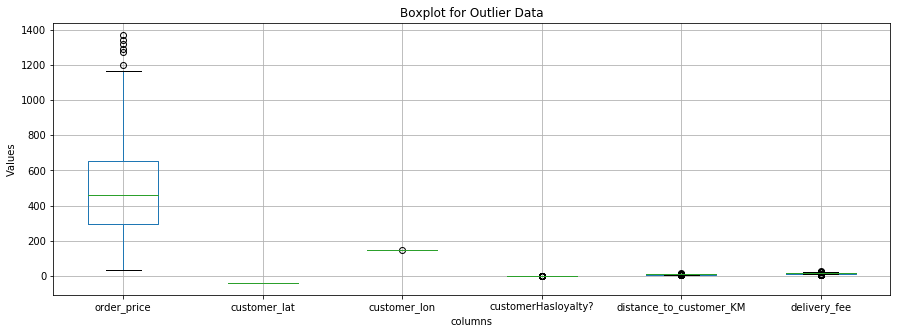

In [87]:
outliers.boxplot(figsize=(15,5)) # function to plot boxlot
plt.xlabel('columns') # xlabel for x axis
plt.ylabel('Values') # ylabel for y axis
plt.title('Boxplot for Outlier Data') # title for the boxplot
plt.show() # show() function to show the plot 

There are outliers in all the columns except customer latitude 

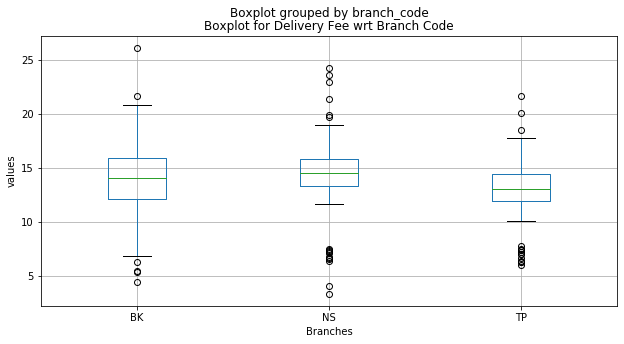

In [88]:
outliers.boxplot('delivery_fee',by='branch_code',figsize=(10,5)) # Function to plot boxplot
plt.xlabel('Branches') # Setting the x label

plt.ylabel('values') # setting the y label

plt.title('Boxplot for Delivery Fee wrt Branch Code')  # setting the title 

plt.show() # function to show the plot 

It can be seen from the graph that there a lot of outliers for BK under the lower fence , where as there are very few
outliers for BK over the upper fence


The outliers for NS are comparitvely equal below the lower fence and above the upper fence. There are more outliers for TP 
below the lower fence rather than above the upper fence.

Hence the outliers in all three branches are concentrated below the lower fence rather than above the upper fence.

# Removing outliers using residuals : 

### Methodology : 

The outliers are data points that differ significantly from the other points. 

The outliers are computed using the residual method, as the residuals are more accurate. 

The Linear Regression  model used for imputing the missing values, is used in rectifying the outliers as well .

The Linear Regression is used to model the relationship between the Scalar Response and one or more Explanatory  Variables.

The Scalar Response in this case is the Delivery Fee.

It is given that the delivery fee depends upon three factors, i.e. the Explanaotory Variables are : 
    
1.) TimeofDay (A continuous variable (0,1,2)) where 0 represents Morning , 1 - represents Afternoon and 2 - Represents Evening

2.) WeekendorWeekday (1 or 0 ) : 1 represents weekend and 0 represents weekday.
    
3.) Distance  between branch and customer (KM).




## Methodology : 

The methodology Consits of the following Steps : 
    
1.) Adding Features :  The Features are added using the addfeatures function, this function takes input as the dataframe and returns 
    a new dataframe with 2 extra columns i.e. timeofday and weekend or weekday.
    
2.) Adding Original Fee Column to Customers with loyalty  score 1 : the customers with loyalty 1 .  For the indexes with the customers who have
    loyalty 1 , the corresponding delivery fee is multplied by 2 ( removing index) and the for the customers with loyalty 0
    the corresponding delivery fee is kept as it is.
    
    
3.) Function to retrieve outlier indexes : A function to retrieve outlier indexes is created, the function takes input parameters as the dataframe and the column and give the list of indexes with the outliers.
The outliers are caluclated using the lower fence and upper fence using quartiles i.e. 

The upper Fence is : q3 + 1.5*iqr

The lower fence is : q1 - 1.5*iqr
    
    

4.)  Removing outliers by Branch :  The data frames are seggregated by branch code and the sub dataframes are created. The model used to predict the 
    delivery fee is the lienar model used in missing values. 
    
    The model is trained using the not null rows of the missing value data frame and the training data set is the outlier 
    dataframe . 
    
    The missing values model is used as the average accuracy for all three branches is around 96%.
    
    The  predicted values i.e the delivery fees are the original delivery fees ( without discount). Hence they
    are converted into discounted delivery fees , by dividing by 2 for customers who have 1 as the loyalty point.
    
    
    
    The residuals are caluclated by subtracting the actual delivery fee by the predicted  delivery fee
     
    The outlierindex() function defined in step  3 is used to retrieve the indexes of the outlier rows in each sub dataframe
    
    
    
5)  The collected outlier rows are then dropped.

6.) Exploratory Data Analysis i.e. plotting of Boxplots is also performed inorder to analyse the outliers.



#### Step 1 : Adding  Features :

A function to add features, returns a dataframe with the features : 

In [89]:
outliers1 = addfeatures(outliers) # adding features using the add features() function

#### Step 2 :  Adding Original Fee column for customers who have 1 loyalty : 

In [90]:
for i in range(len(outliers1)): # iterating through the length of the outliers
    if outliers1.loc[i,'customerHasloyalty?'] == 1: # checking if the loyalty is 1 or not
        # multiplying into 2 for the discounted fee if the loyalty is 1
        outliers1.loc[i,'orignial_fee'] = outliers1.loc[i,'delivery_fee']*2
    else:
        # appending the delivery fee as it is for loyalty 0 
        outliers1.loc[i,'orignial_fee'] = outliers1.loc[i,'delivery_fee']

#### Step 3:  Function to retreive  outlier indexes : 

In [91]:
def outlierindex(df, col_name): # 2 arguments, input dataframe and column name 
    q1 = df[col_name].quantile(0.25) # using quantile function to compute the first quartile (25%)
    q3 = df[col_name].quantile(0.75)# using quantile function to compute the third quartile (75%)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr # Computing the lower fence
    fence_high = q3+1.5*iqr # Computing the higher fence
    # The indexes below the lower fence and above the upper fence i.e. the outliers are retrieved and stored in a list
    # The . index method and df.to_list() function is used to convert to a list.
    index = df[(df.residuals < fence_low) | (df.residuals > fence_high) ].index.tolist() 
    
    
    return index

In [92]:
residual_list = [0]*len(outliers1)

## Removing outliers for BK 

In [93]:


# Creating a sub dataframe  for the order type 
bk_outlier=outliers1.copy()
bk_outlier = bk_outlier[bk_outlier.branch_code == "BK"]
# collecting the indexes of BK 
bkindexes = bk_outlier[bk_outlier.branch_code == "BK"].index.tolist()

#  Creating a dataframe to predict the outlier values for delivery fee
model_predict_dataframe_bk = bk_outlier[['weekendorweekday','timeofday','distance_to_customer_KM']]

# predicting the values , using the linear regression moodel defined for BK data 
# The explanotory variables are : timeofday, weekendorweekday and distance
# The Scalar response variable is the delivery fee 
predicted_values_BK = list(regression_BK.predict(model_predict_dataframe_bk))



### Applying Discount on customer loyalty
## Dividing predicted values by 2 inorder to append into the dataframe for customer loyalty 1 : 

final_predicted_bk = [] # list for final predicted values
for i in range(len(bkindexes)):
    if bk_outlier.loc[bkindexes[i],'customerHasloyalty?'] == 1:
        final_predicted_bk.append(predicted_values_BK[i]/2) # dividing predicted values / 2 for customer loyalty 1 
    else:
        # Appending the final values as it is for customer loyalty 0 ( No discount)
        final_predicted_bk.append(predicted_values_BK[i])
        

    
# adding a new column for the predicted delivery fee
bk_outlier['predicted_delivery_fee'] = final_predicted_bk

# Calculating the Residuals 
# the residuals are calculated by the Actual Value - 
bk_outlier['residuals'] = bk_outlier['delivery_fee'] - bk_outlier['predicted_delivery_fee']
bk_residuals = list (bk_outlier['residuals'])

# Calculating the quartiles  using the quantile function()
# the first 25% percent values reprecent the First Quartile
# the first 75% percent values reprecent the Third Quartile
 
q1 = bk_outlier['residuals'].quantile(0.25)
q3 = bk_outlier['residuals'].quantile(0.75)

# Computing the Inter Quartile Range
iqr = q3 - q1

# Computing the  lower fence and upper fence using the Quartiles and inter Quartile Range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr


# Printing the upper and lower fences 
print("Upper Fence for Bk is : ",fence_high)
print("Lowerfence for Bk is : ",fence_low)
print("iqr for bk is ",iqr)

Upper Fence for Bk is :  0.9568608473726665
Lowerfence for Bk is :  -0.8023619571860263
iqr for bk is  0.4398057011396732


## Exploratory Data Analysis for BK Branch : 


###### a) Boxplot for BK Branch 

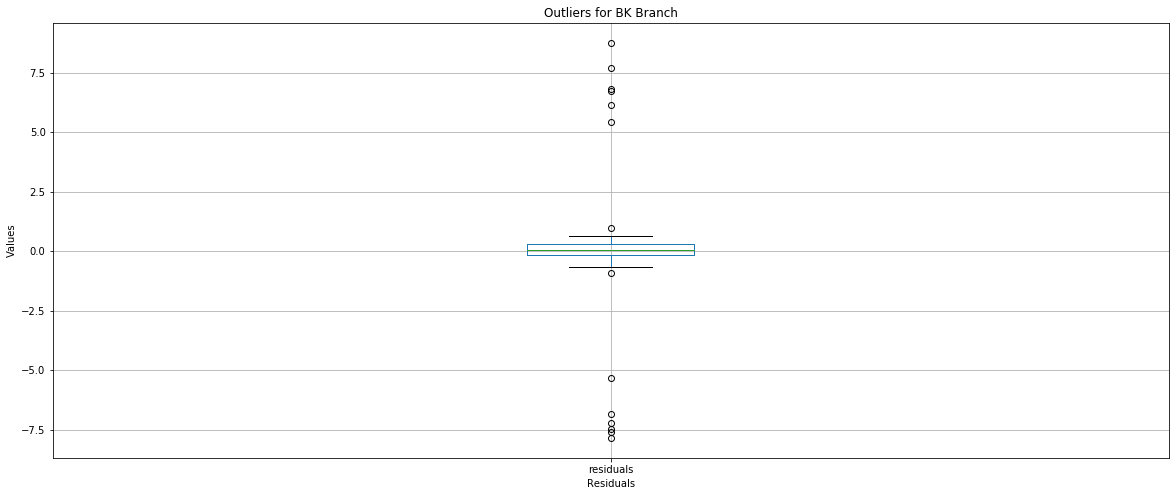

In [94]:
bk_outlier.boxplot('residuals',figsize=(20,8)) # Function to plot the boxplot
plt.title('Outliers for BK Branch') # plt.title() to set the title
plt.xlabel('Residuals') # Function to Set the x axis label
plt.ylabel('Values') # Function to set the y axis label
plt.show() # function to show the plot 

It can be conluded  from the boxplot that the number of outliers below the lower fence are more denser as opposed to 
the number of outliers above the higher fence.

#### b) Scatter plot for BK Branch 

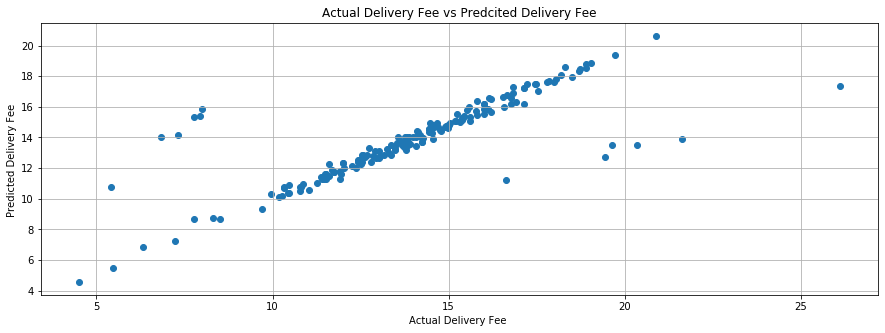

In [95]:
plt.figure(figsize=(15,5))
plt.scatter(bk_outlier.delivery_fee,bk_outlier.predicted_delivery_fee)
plt.grid()
plt.xlabel("Actual Delivery Fee ")
plt.ylabel("Predicted Delivery Fee ")

plt.title("Actual Delivery Fee vs Predcited Delivery Fee")
plt.show()

It can be concluded from the scatter plot that relationship between the actual values and predicted values is linear.
That is it can be concluded that the model is a good fit as the graph looks fairly linear. 

#### Retriving outlier indexes for BK 

In [96]:
bk_outlier_index = outlierindex(bk_outlier,'residuals') # Collecting the outlier indexes using outlierindex() function
print("total outliers for branch code  BK are : ",len(bk_outlier_index)) # printing the outlier index



total outliers for branch code  BK are :  14


#### Adding the values of the residuals to a list inorder to create the total residual list 

In [97]:
for i in range(len(bkindexes)): # iterating through the indexes of BK
    residual_list[bkindexes[i]] = bk_residuals[i] # adding the values at the BK index positions 

# Removing outliers for NS : 

In [98]:


# Creating a sub dataframe  for the order type
NS_outlier= outliers1.copy()
NS_outlier = NS_outlier[NS_outlier.branch_code == "NS"]

# collecting the indexes of BK 
nsindexes = NS_outlier[NS_outlier.branch_code == "NS"].index.tolist()

#  Creating a dataframe to predict the outlier values for delivery fee
model_predict_dataframe_ns = NS_outlier[['weekendorweekday','timeofday','distance_to_customer_KM']]




# predicting the values , using the linear regression moodel defined for BK data 
# The explanotory variables are : timeofday, weekendorweekday and distance
# The Scalar response variable is the delivery fee 
predicted_values_NS = list(regression_NS.predict(model_predict_dataframe_ns))



### Applying Discount on customer loyalty
## Dividing predicted values by 2 inorder to append into the dataframe for customer loyalty 1 : 


final_predicted_ns = []    # list for final predicted values
for i in range(len(nsindexes)): # iterating through the list of NS indexes 
    if NS_outlier.loc[nsindexes[i],'customerHasloyalty?'] == 1: # Checking for Customer Loyalty == 1
        final_predicted_ns.append(predicted_values_NS[i]/2)# dividing predicted values / 2 for customer loyalty 1 
    else:
         # Appending the final values as it is for customer loyalty 0 ( No discount)
        final_predicted_ns.append(predicted_values_NS[i])
        





# adding a new coloumn for the predicted values
NS_outlier['predicted_delivery_fee'] = final_predicted_ns


#calculating the residuals ( actual - predicted )
NS_outlier['residuals'] = NS_outlier['delivery_fee'] - NS_outlier['predicted_delivery_fee']





# Computing the first quartile using the quantile function
# the quantile (0.25) returns the 25th percentile value
q1 = NS_outlier['residuals'].quantile(0.25)
# Computing the third qurtile  using the quantile function
# The quantile(0.75) returns the 75th percentile value
q3 = NS_outlier['residuals'].quantile(0.75)
# Computing the interquartile range
iqr = q3 - q1 # IQR = quartile3 - quartile 1


# Calculating the lower fence and upper fence
fence_low  = q1-1.5*iqr # formula for lower fence
fence_high = q3+1.5*iqr # formula for Lower Fence 

# printing the upper and lower Fence .
print("Upper Fence for NS is : ",fence_high) # printing the upper fence
print("Lowerfence for NS is : ",fence_low) # printinng the lower fence
print("iqr for NS is : ",iqr) # printing the inter quartile range 

Upper Fence for NS is :  0.832091342386577
Lowerfence for NS is :  -0.932124609494756
iqr for NS is :  0.44105398797033324


In [99]:
# Retriving the index of the outliers using the outlierindex() function

ns_outlier_index = outlierindex(NS_outlier,'residuals')
print("The number of outliers for NS Branch " ,len(ns_outlier_index)) # Printing the number of outliers for NS


The number of outliers for NS Branch  10


# Adding the Residuals to residual list  : 

In [100]:
# Iterating through the faulty indexes of NS Branch to  add the residuals in the corresponding index of the NS Branch
NS_residuals =  list(NS_outlier.residuals)
for i in range(len(nsindexes)): 
    residual_list[nsindexes[i]] = NS_residuals[i]  # adding the residuals into the desired positions 

## EDA for NS Branch Code :  

## Box plot for NS :

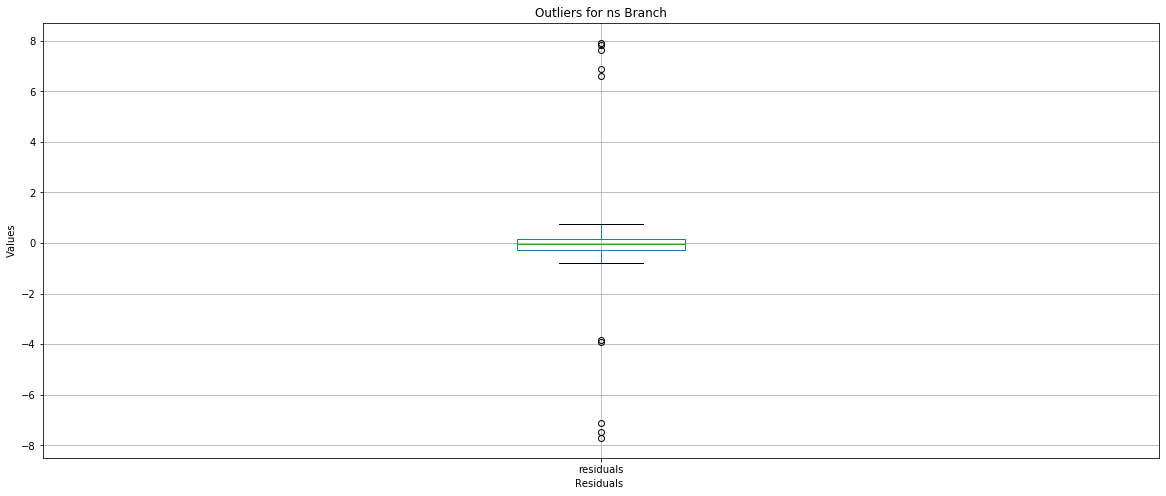

In [101]:
NS_outlier.boxplot('residuals',figsize=(20,8)) # Function to plot the boxplot
plt.title('Outliers for ns Branch') # plt.title() to set the title
plt.xlabel('Residuals ') # Function to Set the x axis label
plt.ylabel('Values') # Function to set the y axis label
plt.show() # function to show the plot 

It can be concluded that the number of outliers below the lower fence are more denser as opposed to the number of outliers
above the upper fence 

# Scatter plot for NS : 

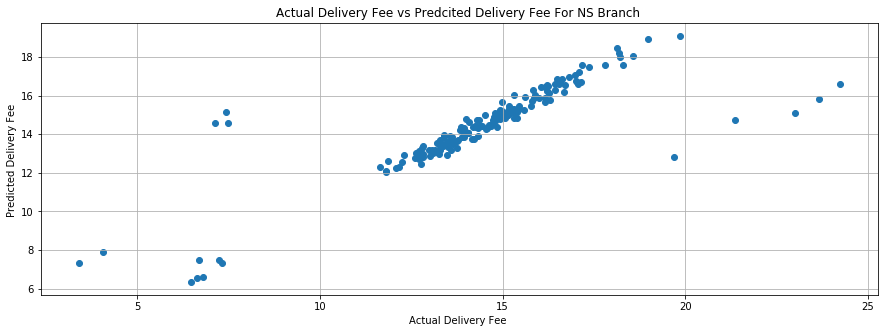

In [102]:
plt.figure(figsize=(15,5))
plt.scatter(NS_outlier.delivery_fee,NS_outlier.predicted_delivery_fee)
plt.grid()
plt.xlabel("Actual Delivery Fee ")
plt.ylabel("Predicted Delivery Fee ")

plt.title("Actual Delivery Fee vs Predcited Delivery Fee For NS Branch ")


plt.show()

It can be interpretted from the graph that the relationship between the actual delivery fee and the predicted delivery is 
fairly linear.


Hence, it can be conlcuded that the model is a good fit . 

# Removing outliers for TP : 

In [103]:
# Creating a sub dataframe  for the order type 
TP_outlier = outliers1.copy()
TP_outlier = TP_outlier[TP_outlier.branch_code == "TP"]

# The indexes of the TP branch code are retrieved using the .index method, and they are converted into a list using the .to_list()
#method
tpindexes = outliers1[outliers1.branch_code == "TP"].index.to_list()

# Selecting a dataframe with the desired factors , inorder to predict values
model_predict_dataframe_tp = TP_outlier[['weekendorweekday','timeofday','distance_to_customer_KM']]

# Predicted Values are predicted using the .predict() function
predicted_values_TP = list(regression_TP.predict(model_predict_dataframe_tp))


#  list for the final predicted values
final_predicted_tp = []
for i in range(len(tpindexes)):  # iterating through the length of the indexes for TP  Branchcode
    if outliers1.loc[tpindexes[i],'customerHasloyalty?'] == 1: # if condition for custoer loyalty == 1
        final_predicted_tp.append(predicted_values_TP[i]/2) # dividing the predicted delivery fee by 2 inorder to avail the discount.
    else:
        # Else condition for customer loyalty == 0 
        # The predicted values are appended as it is , as there are no discounts for loyalty 0
        final_predicted_tp.append(predicted_values_TP[i])
        








# Creating a new column for the predicted delivery fee
TP_outlier['predicted_delivery_fee'] = final_predicted_tp


# computing the residuals by subtracting the predicted from actual 

# residual = actual  - predicted
TP_outlier['residuals'] = TP_outlier['delivery_fee'] - TP_outlier['predicted_delivery_fee']












q1 = TP_outlier['residuals'].quantile(0.25)  # Computing the First Quartile for residuals
q3 = TP_outlier['residuals'].quantile(0.75)  # Computing the Third Quartile for residuals 
iqr = q3 - q1 # Computing the IQR
fence_low  = q1-1.5*iqr # computing the lower fence
fence_high = q3+1.5*iqr  # Computing the upper fence

print("Upper Fence for TP is : ",fence_high) # printing upper fence
print("Lowerfence for TP is : ",fence_low) # pringint the lower fence 
print("iqr for TP is :",iqr) # printing the Inter Quartile Range 

Upper Fence for TP is :  0.8472113429558352
Lowerfence for TP is :  -0.8487388487555563
iqr for TP is : 0.4239875479278479


##  Retriving the outlier indexes  for TP : 

In [104]:
# Storing the outlier indexes in a variable as a list using the outlier index() function
TP_outlier_index = outlierindex(TP_outlier,'residuals')
print("The number of outliers for TP are : " , len(TP_outlier_index)) # printing the number of outliers for TP 


The number of outliers for TP are :  8


# Exploratory Data Analysis for TP : 




### Box plot for TP Branch

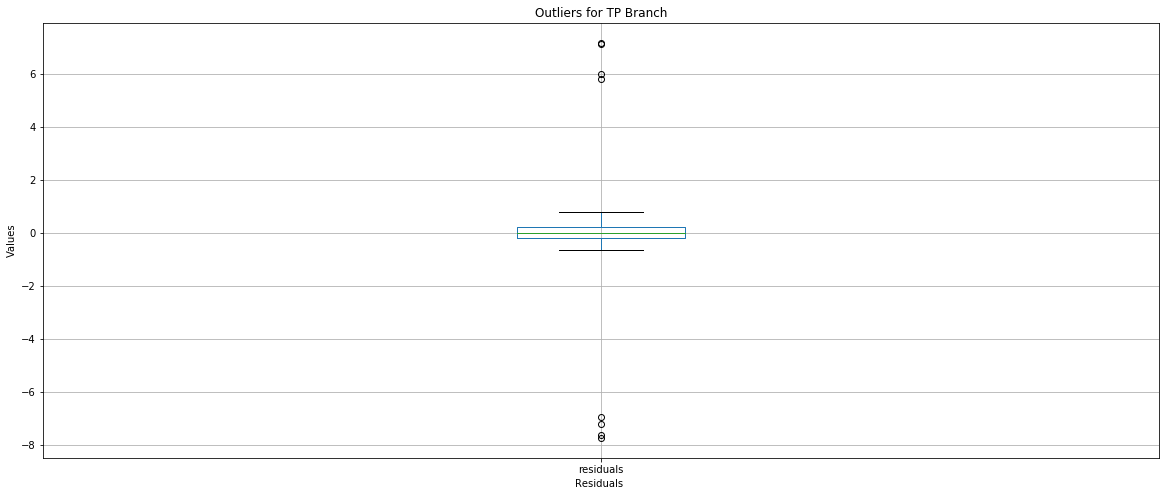

In [105]:
TP_outlier.boxplot('residuals',figsize=(20,8)) # Function to plot the boxplot
plt.title('Outliers for TP Branch') # plt.title() to set the title
plt.xlabel('Residuals ') # Function to Set the x axis label
plt.ylabel('Values') # Function to set the y axis label
plt.show() # function to show the plot 

In [106]:
# Adding the residuals to the residual list for TP 

In [107]:
# Iterating through the faulty indexes of NS Branch to  add the residuals in the corresponding index of the NS Branch
TP_residuals =  list(TP_outlier.residuals)
for i in range(len(tpindexes)): 
    residual_list[tpindexes[i]] = TP_residuals[i]  # adding the residuals into the desired positions 

It can be observed from the boxplot that the outliers are concentrated below the lower fence , rather than above the upper fence.

### Scatter plot for TP Branch : 

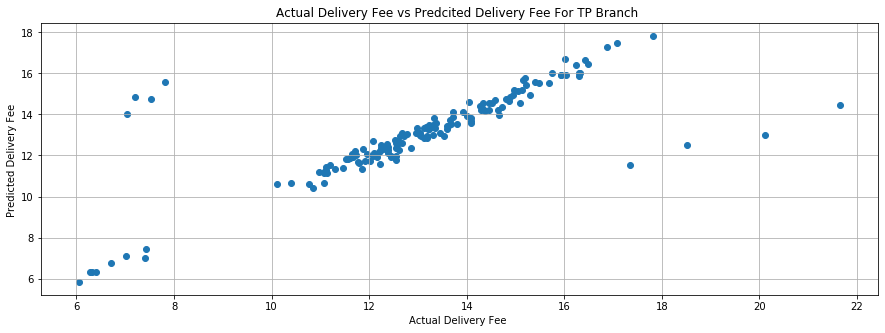

In [108]:
plt.figure(figsize=(15,5))
plt.scatter(TP_outlier.delivery_fee,TP_outlier.predicted_delivery_fee)
plt.grid()
plt.xlabel("Actual Delivery Fee ")
plt.ylabel("Predicted Delivery Fee ")

plt.title("Actual Delivery Fee vs Predcited Delivery Fee For TP Branch ")


plt.show()

It can be interpreted from the graph that the relation between the actual value and the predicted value is fairly linear
hence the model is a good fit .

### Step 5 :  Computing the Total Outliers : 

In [109]:
totaloutlierindex = ns_outlier_index + bk_outlier_index + TP_outlier_index
print(" The total outliers are : ", len(totaloutlierindex))

 The total outliers are :  32


In [110]:
outliers1['residuals'] = residual_list

## Dropping the outlier rows  : 

In [111]:
outliersfinal = outliers1.drop(outliers1.index[totaloutlierindex])

In [112]:
print( " The length of the data frame before dropping the outlier rows are : ",len(outliers1))

 The length of the data frame before dropping the outlier rows are :  500


In [113]:
print("The length of the outlier rows after dropping the outlier rows are : ",len(outliersfinal))

The length of the outlier rows after dropping the outlier rows are :  468


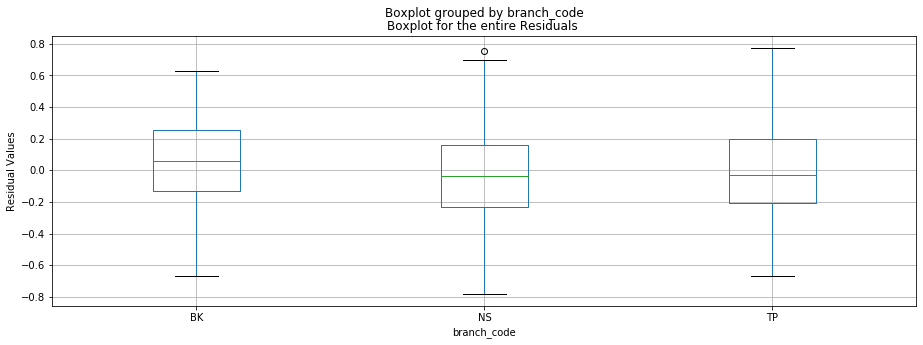

In [114]:

outliersfinal.boxplot(column='residuals',by='branch_code',figsize=(15,5))
plt.title('Boxplot for the entire Residuals ')

plt.ylabel('Residual Values')

plt.show()

It can be seen from the boxplot that most of the  outliers  in all the branches are removed. 

###  Saving the Dataframes as CSV Files

### Group069_dirty_data_solution

In [116]:
## Dropping timeofday, weekendorweekday,predictedvalues,residuals from dirty_data and storing into a new dataframe
clean_dirty_data=dirty_data.drop(['timeofday','weekendorweekday','predictedvalues','Residuals'],axis=1)

In [117]:
#writing this data format by using DataFrame.to_csv() method
clean_dirty_data.to_csv('Group069_dirty_data_solution.csv',index=None)

### Group069_missing_data_solution

In [118]:
## Dropping timeofday, weekendorweekday,original_fee from dirty_data and storing into a new dataframe
clean_missing_data=missing_data.drop(['original_fee','weekendorweekday','timeofday'],axis=1)

In [119]:
#writing this data format by using DataFrame.to_csv() method
clean_missing_data.to_csv('Group069_missing_data_solution.csv',index=None)

### Group069_missing_data_solution

In [120]:
## Dropping timeofday, weekendorweekday,original_fee from outlier and storing into a new dataframe
clean_outlier_data = outliersfinal.drop(['timeofday','weekendorweekday','orignial_fee','residuals'],axis=1)

In [121]:
#writing this data format by using DataFrame.to_csv() method
clean_outlier_data.to_csv('Group069_outlier_data_solution.csv',index=None)

# Summary:

The main tasks of the assignment were : 
    
    i.)  Cleaning the dirty data.
    ii.)  Imputing missing values
    iii.) Removing th outliers
    
### i) Cleaning the dirty data : 

For the cleaning of the dirty data, the pandas dataframes and python regular expressions were used. 
Also, the Date Time library were used to convert date string to datetime object.


Also, there was extensive usage of python collections such as lists, tuples , dictionaries and sets. Also, python
conditional statements such as if,elif and else loops were used. Also, iterables such as for loops were used.

The order in which the coloumns  were cleaned are : 
    i) Date coloumn : Date coloumn was cleaning using regex and string operations.
    
    ii) Ordertype based on time - the order type were set depending on the time. The time was compared to boundary times 
        for Breakfast and Lunch and Dinner and based on time , the order type were repaired.
        
    iii) Repairing Branch Code : The branchcode code was first converted into upper case as the initial branch code contains both lower 
        and upper case . Then based on the order id pattern extracted from outlier dataset the faulty branch codes were replaced with the correct branch codes
    
    iv) Repairing Order items : Order items were converted into a list of tuples and the faulty order items were replaced with the correct
        order items using python collections, conditional statements  and iterrables.
        
    v) Repairing order price : The order price was repired according to the menu by calculating the price of the corrected order items of that instance 
        
    vi) Repairing latitude and Longitude : The latitude and longitude were interchanged for the faulty rows. For the 
        latitude the positive co-ordinate value were converted to negative co-ordinate value.
        
    vii) Fixing Distance to Customer : The distance to customer were computed using the Dijkstra's shortest path length.
        
### ii) Imputing Missing Data : 


    i) Missing Branch codes imputation : The branch codes were imputed using the order id pattern extracted in the outlier data.
    
    ii) Missing distances - The missing distances were computed using the Dijkistra Algorithm
    
    iii) Missing delivery fee - The missing delivery fee was computed using the linear regression, by passing the not null values
    in the training dataset and testing with the missing value data set.
    

### Correcting Customer Loyalty in dirty data based on the linear model in missing data : 
The customer loyalty was corrected by predicting the delivery fee using the model fitted in the missing data. 
The customer loyalty was corrected using the predicted delivery fee. 


###  iii) Imputing outliers : 

The outliers were imputed using the linear regression model fitted in the missing data. 

The outliers were removed based on the residuals ( Actual - Predicted Values)


Overall, this assignment helped us in providing a good understanding about pandas dataframes and its operations, networkx and 
djikstra algorithm ,Linear Regression, imputation of the missing values , outlier removal and data cleaning.

# References :

- https://pandas.pydata.org/pandas-docs/version/0.25/
- https://networkx.github.io/documentation/stable/
- https://regexr.com/
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve
- https://docs.python.org/3/tutorial/datastructures.html
- https://docs.scipy.org/doc/